# 📄✏ Problem Statement:
**Brief:** Phishing is a type of fraud in which an attacker impersonates a reputable company or
person in order to get sensitive information such as login credentials or account
information via email or other communication channels. Phishing is popular among
attackers because it is easier to persuade someone to click a malicious link that appears
to be authentic than it is to break through a computer's protection measures.
The mail goal is to predict whether the domains are real or malicious.

####

#EDA
1. Data Collection
2. Data Cleaning
3. Data Visualisation
4. Data Transformation
5. Data Analysis
6. Statistical Modelling
7. Inferences

In [118]:
base_url = "sample_data/"

In [119]:
import os

In [120]:
os.listdir(base_url)

['README.md',
 'anscombe.json',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv']

# Using Pandas Profiling

In [121]:
# pip install pandas_profiling

In [122]:
import pandas as pd
import numpy as np
# from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [123]:
df = pd.read_csv('dataset_full.csv')

In [124]:
df.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
3                    0              0              0              0   
4                    0              0              0              0   

   qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
0             0                 0                0               0   
1             0                 0                0               0   
2             0                 0                0               0   
3             0                 0                0               0   
4             0                 0                0               0   

   qty_percent_url  qty_tld_url  length_url  qty_dot_domain  \
0                0            1          25               2   
1                0            3         223               2   
2                0            1          15               2   
3                0            1          81               2   
4                0            1          19               2   

   qty_hyphen_domain  qty_underline_domain  qty_slash_domain  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   
3                  0                     0                 0   
4                  0                     0                 0   

   qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  \
0                        0                 0              0               0   
1                        0                 0              0               0   
2                        0                 0              0               0   
3                        0                 0              0               0   
4                        0                 0              0               0   

   qty_exclamation_domain  qty_space_domain  qty_tilde_domain  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   

   qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  \
0                 0                0                    0                   0   
1                 0                0                    0                   0   
2                 0                0                    0                   0   
3                 0                0                    0                   0   
4                 0                0                    0                   0   

   qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  \
0                  0                   0                  4             17   
1                  0                   0                  5           

## Phishing Domain Detection Dataset

The dataset provided is related to phishing domain detection. It contains various features that describe different characteristics of URLs or domains. The last column, "phishing," indicates whether the URL is classified as a phishing domain or not, with 1 representing phishing and 0 representing non-phishing.

### Features

Here's a breakdown of some of the features present in the dataset:

- `qty_dot_url`: Number of dots in the URL.
- `qty_hyphen_url`: Number of hyphens in the URL.
- `qty_underline_url`: Number of underscores in the URL.
- `qty_slash_url`: Number of slashes in the URL.
- `qty_questionmark_url`: Number of question marks in the URL.
- `qty_equal_url`: Number of equal signs in the URL.
- `qty_at_url`: Number of "at" symbols (@) in the URL.
- `qty_and_url`: Number of ampersands (&) in the URL.
- `qty_exclamation_url`: Number of exclamation marks in the URL.
- `qty_space_url`: Number of spaces in the URL.
- `qty_ip_resolved`: Number of IP addresses resolved from the domain.
- `qty_nameservers`: Number of name servers for the domain.
- `qty_mx_servers`: Number of mail servers for the domain.
- `ttl_hostname`: Time to live (TTL) of the domain's hostname.
- `tls_ssl_certificate`: Indicates the presence of a TLS/SSL certificate (1 if present, 0 if not).
- `qty_redirects`: Number of redirects involved in the URL.
- `url_google_index`: Indicates whether the URL is indexed by Google (1 if indexed, 0 if not).
- `domain_google_index`: Indicates whether the domain is indexed by Google (1 if indexed, 0 if not).
- `url_shortened`: Indicates whether the URL is a shortened URL (1 if shortened, 0 if not).

The values in each column represent the corresponding feature value for a specific URL or domain.

### Dataset Purpose

The dataset aims to provide features that can help in the detection of phishing domains. It includes indicators such as the structure of the URL, presence of certain characters, DNS-related information, and Google indexing status.



In [125]:
df.shape

(88647, 112)

In [126]:
# profile = ProfileReport(df, title = 'Phishing Domain Data', explorative=True, dark_mode=True)

In [127]:
# profile.to_file('data_eda.html') ## Too many features, pandas profiling not working

# Ignoring Pandas Profiling. Features too many, crashing the jupyter notebook

# self implementation of eda

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

### cleaning, visualisation, transformation, analysis:
  
1. Missing Values
2. Numerical vars
3. Temporal Features
4. Distribution of numerical vars (Catgroical and Discrete) + different transformations
5. Categorical variables
6. Outliers


In [130]:
## domains' Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


# 1. Missing Values

In [131]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [132]:
df.isnull().sum().sum()

0

83 missing values
# handle missing vals-
Imputing numerical features with the mean, median, or a specific value.
Imputing categorical features with the mode or a specific value.

In [133]:
# Impute missing values with mean for numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(len(numerical_features))
# all features are numerical

112


In [134]:
# for numerical_feature in numerical_features:
#   df[numerical_feature].fillna(df[numerical_feature].mean(),inplace=True)
# list comprehension:
[df[numerical_feature].fillna(df[numerical_feature].mean(), inplace=True) for numerical_feature in numerical_features]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [135]:
df.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
3                    0              0              0              0   
4                    0              0              0              0   

   qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
0             0                 0                0               0   
1             0                 0                0               0   
2             0                 0                0               0   
3             0                 0                0               0   
4             0                 0                0               0   

   qty_percent_url  qty_tld_url  length_url  qty_dot_domain  \
0                0            1          25               2   
1                0            3         223               2   
2                0            1          15               2   
3                0            1          81               2   
4                0            1          19               2   

   qty_hyphen_domain  qty_underline_domain  qty_slash_domain  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   
3                  0                     0                 0   
4                  0                     0                 0   

   qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  \
0                        0                 0              0               0   
1                        0                 0              0               0   
2                        0                 0              0               0   
3                        0                 0              0               0   
4                        0                 0              0               0   

   qty_exclamation_domain  qty_space_domain  qty_tilde_domain  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   

   qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  \
0                 0                0                    0                   0   
1                 0                0                    0                   0   
2                 0                0                    0                   0   
3                 0                0                    0                   0   
4                 0                0                    0                   0   

   qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  \
0                  0                   0                  4             17   
1                  0                   0                  5           

In [136]:
df.isnull().sum().sum()

0

# duplicates

In [137]:
df.duplicated().sum()

1438

In [138]:
df.drop_duplicates(inplace=True)

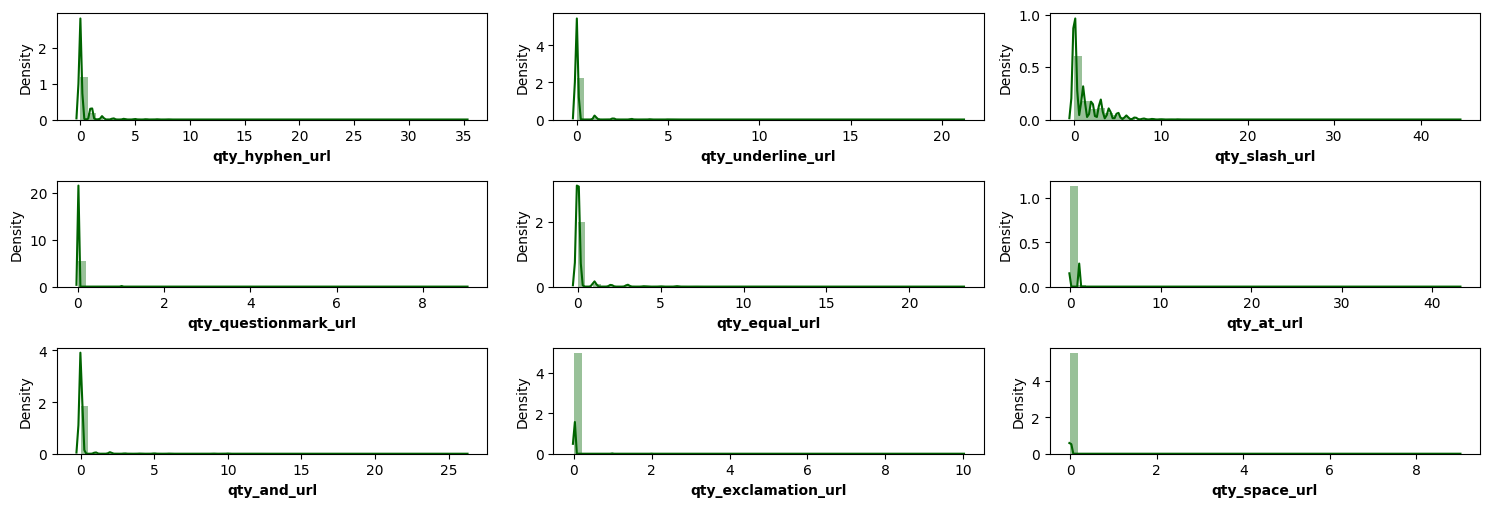

In [139]:
# let's have a look at the distribution first 5 features

plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:10]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='darkgreen')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

# Numerical Variables

In [140]:
df.head()

qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0            3               0                  0              1   
1            5               0                  1              3   
2            2               0                  0              1   
3            4               0                  2              5   
4            2               0                  0              0   

   qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                     0              0           0            0   
1                     0              3           0            2   
2                     0              0           0            0   
3                     0              0           0            0   
4                     0              0           0            0   

   qty_exclamation_url  qty_space_url  qty_tilde_url  qty_comma_url  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
3                    0              0              0              0   
4                    0              0              0              0   

   qty_plus_url  qty_asterisk_url  qty_hashtag_url  qty_dollar_url  \
0             0                 0                0               0   
1             0                 0                0               0   
2             0                 0                0               0   
3             0                 0                0               0   
4             0                 0                0               0   

   qty_percent_url  qty_tld_url  length_url  qty_dot_domain  \
0                0            1          25               2   
1                0            3         223               2   
2                0            1          15               2   
3                0            1          81               2   
4                0            1          19               2   

   qty_hyphen_domain  qty_underline_domain  qty_slash_domain  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   
3                  0                     0                 0   
4                  0                     0                 0   

   qty_questionmark_domain  qty_equal_domain  qty_at_domain  qty_and_domain  \
0                        0                 0              0               0   
1                        0                 0              0               0   
2                        0                 0              0               0   
3                        0                 0              0               0   
4                        0                 0              0               0   

   qty_exclamation_domain  qty_space_domain  qty_tilde_domain  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   

   qty_comma_domain  qty_plus_domain  qty_asterisk_domain  qty_hashtag_domain  \
0                 0                0                    0                   0   
1                 0                0                    0                   0   
2                 0                0                    0                   0   
3                 0                0                    0                   0   
4                 0                0                    0                   0   

   qty_dollar_domain  qty_percent_domain  qty_vowels_domain  domain_length  \
0                  0                   0                  4             17   
1                  0                   0                  5           

### All features are already numerical

# Numerical Features -

1. Continuous Features

2. Discrete Features

### Discrete Features

In [141]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique())<=25]

In [142]:
len(discrete_features)

95

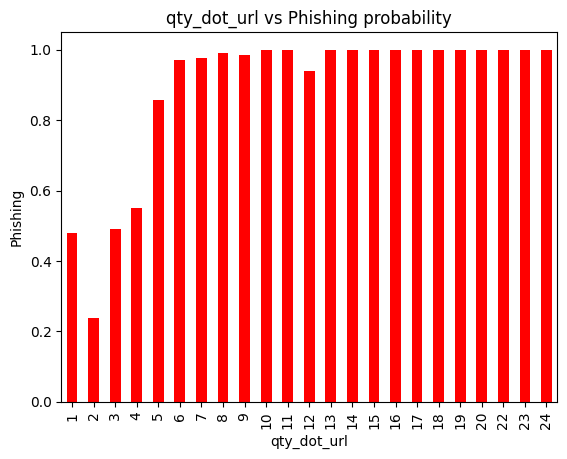

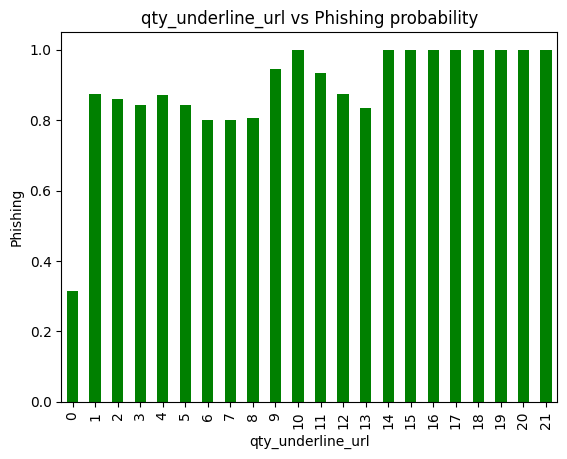

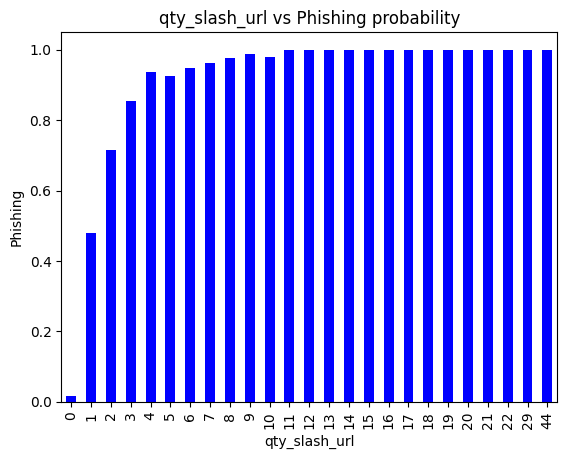

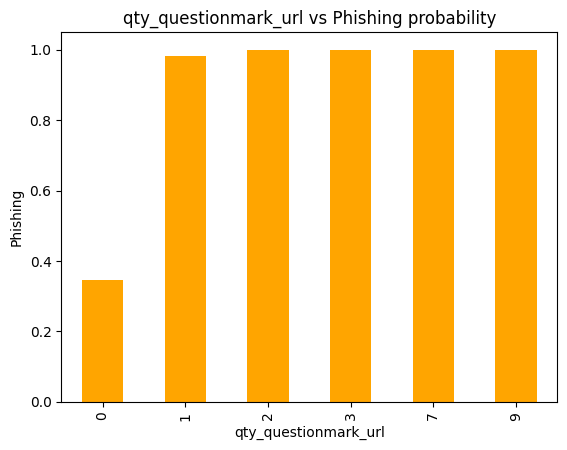

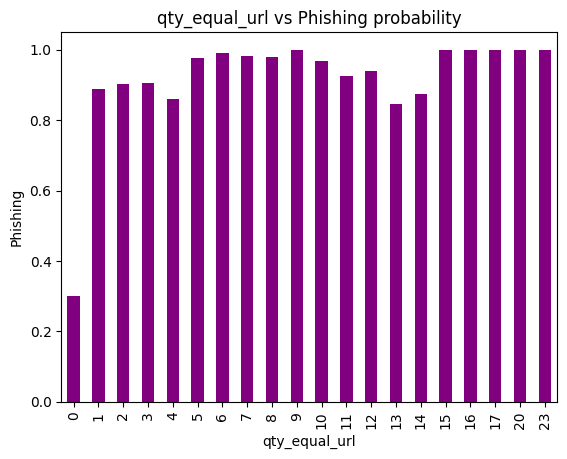

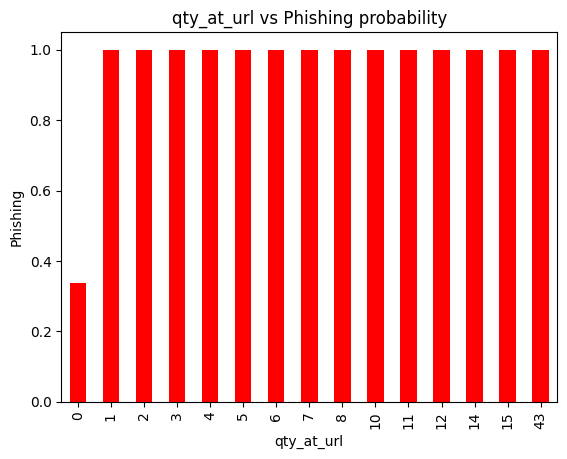

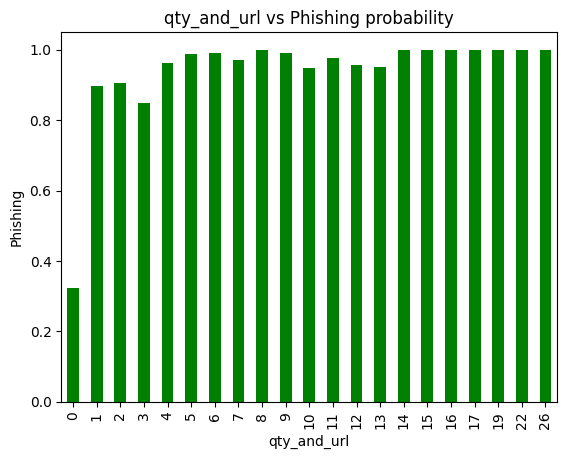

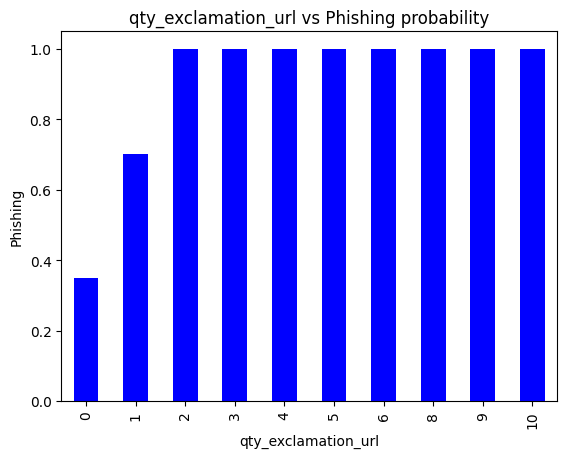

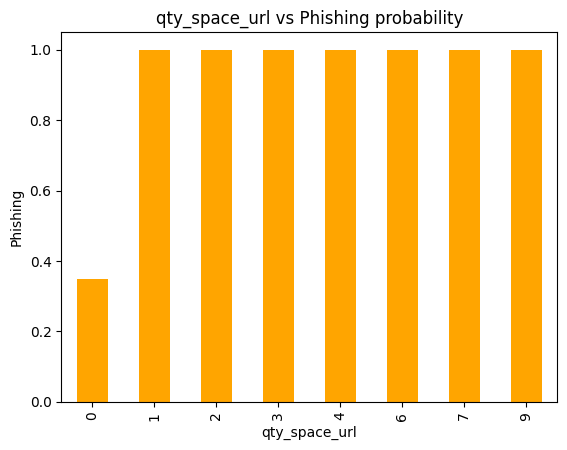

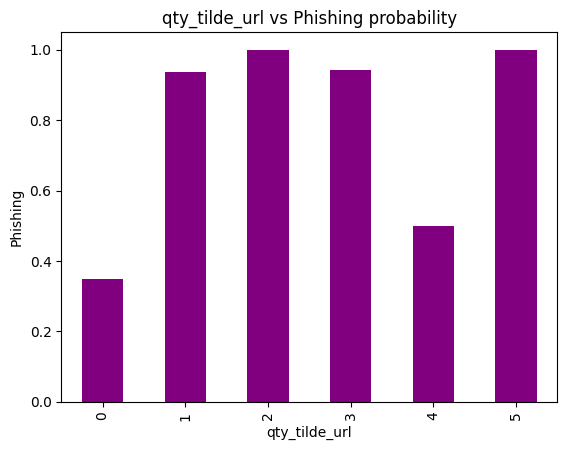

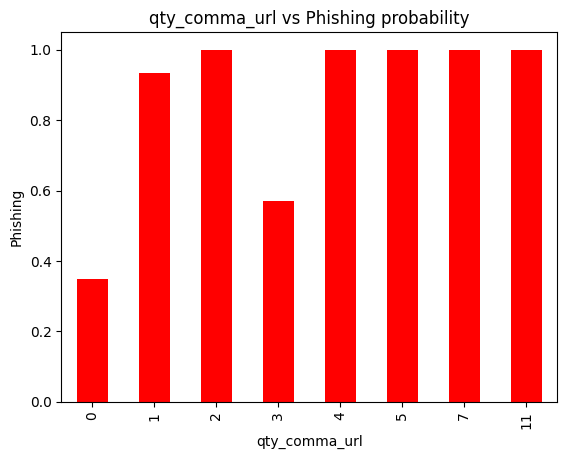

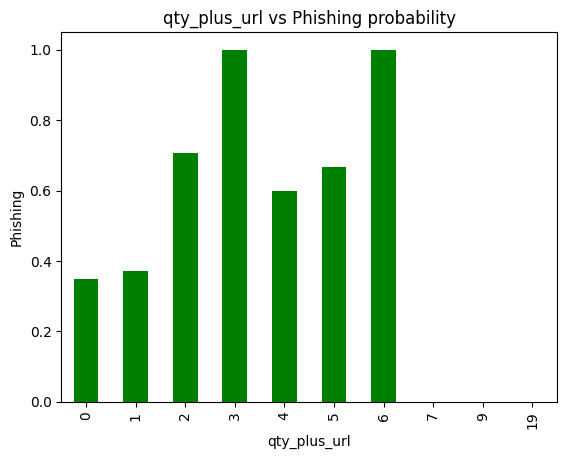

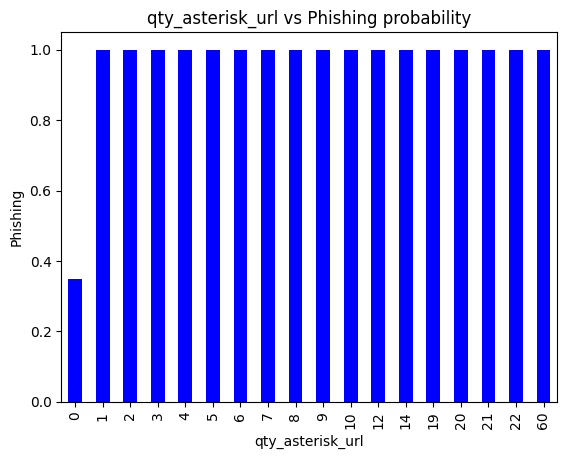

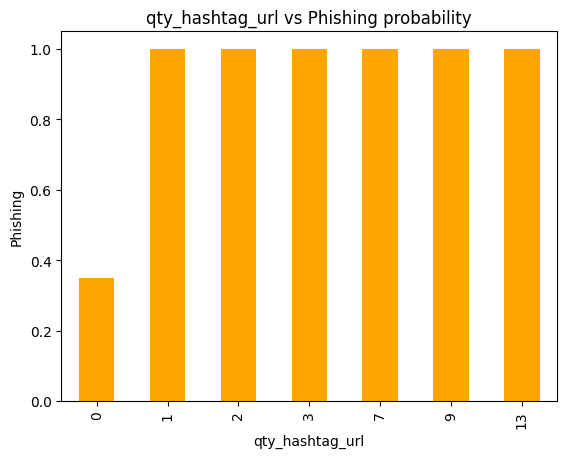

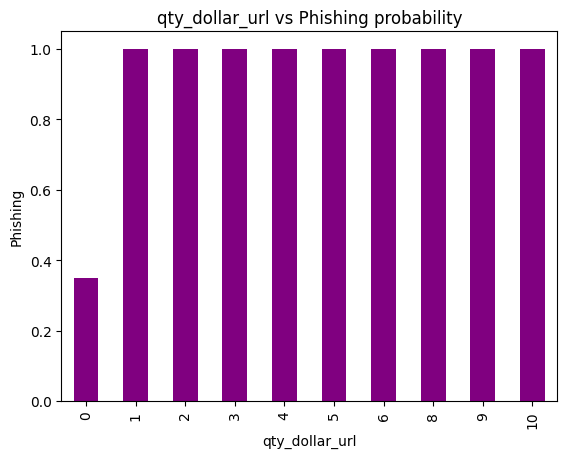

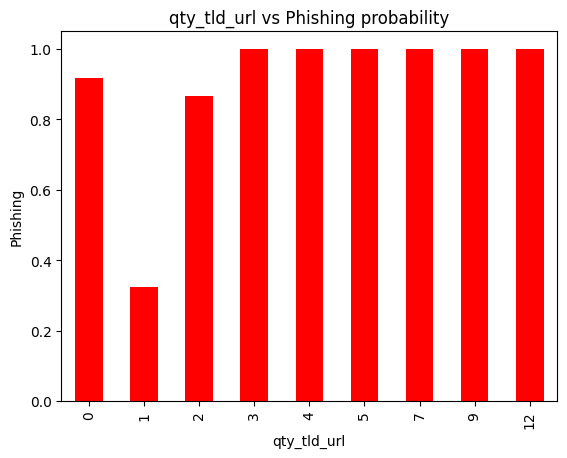

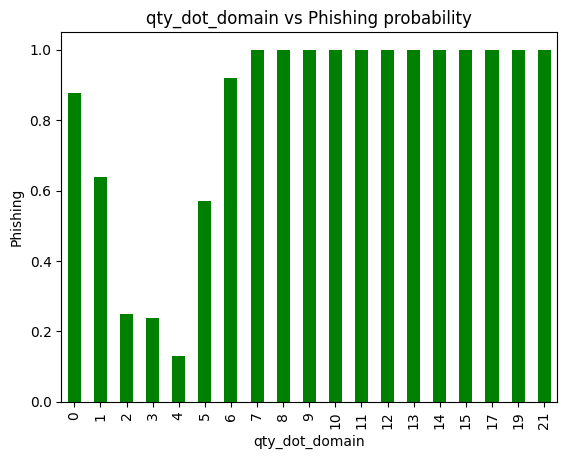

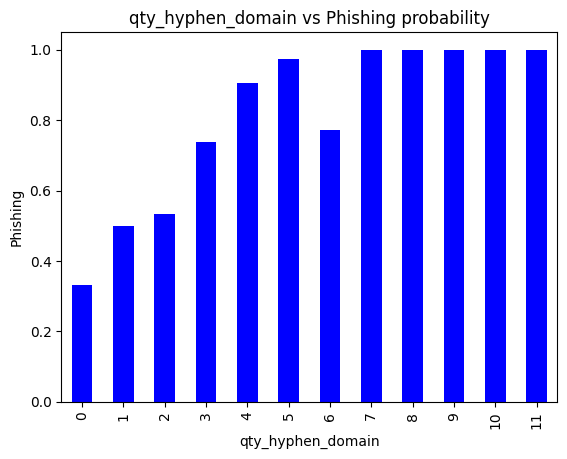

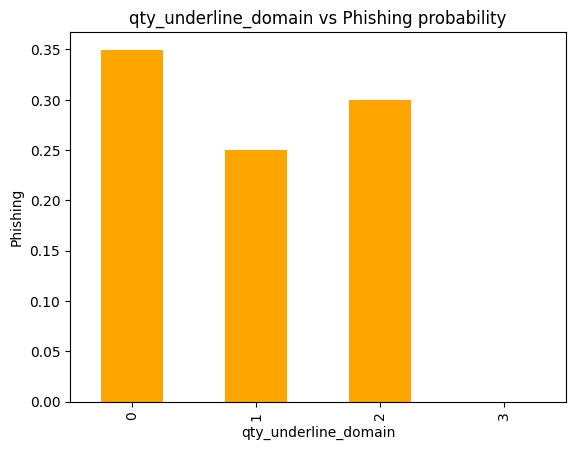

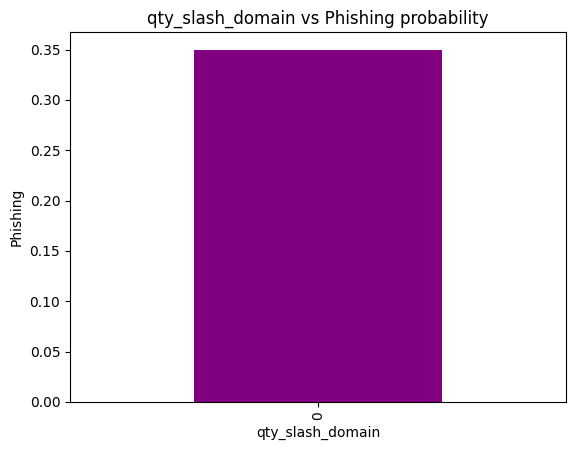

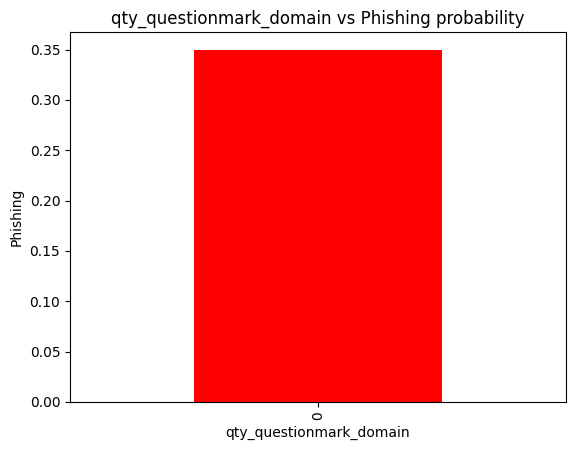

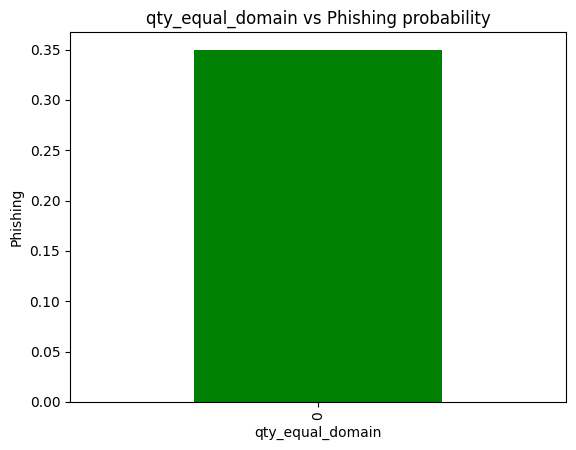

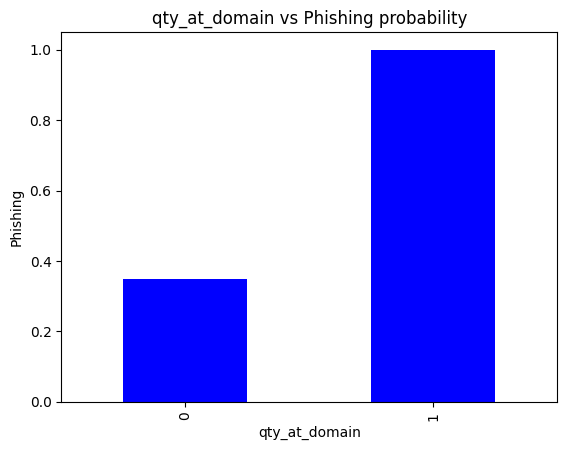

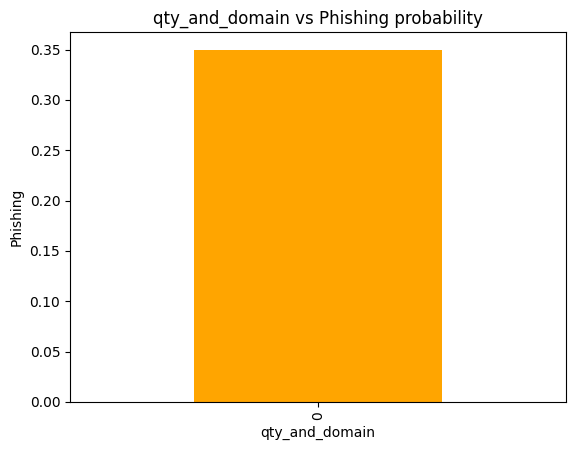

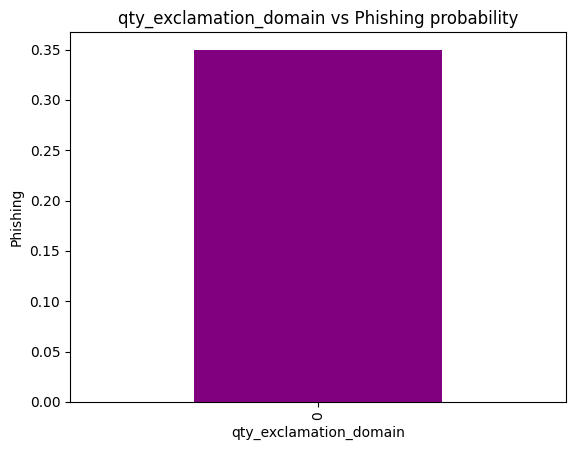

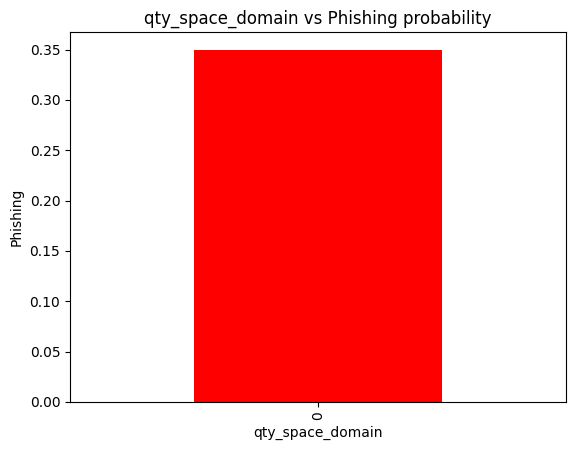

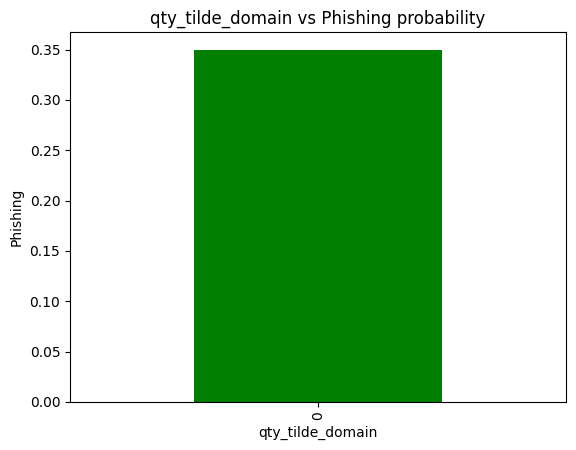

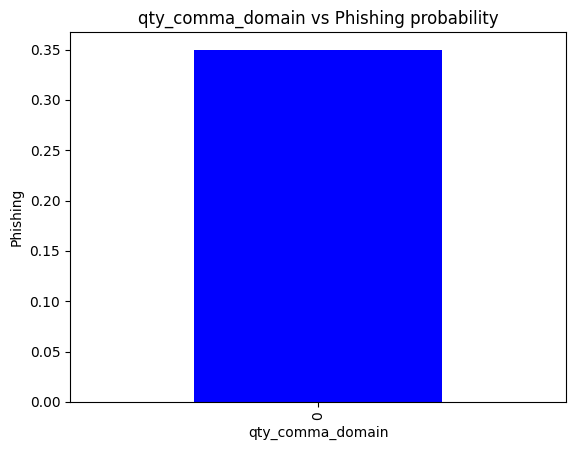

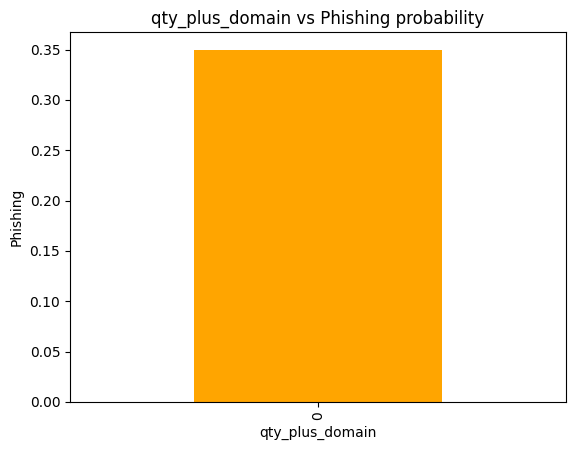

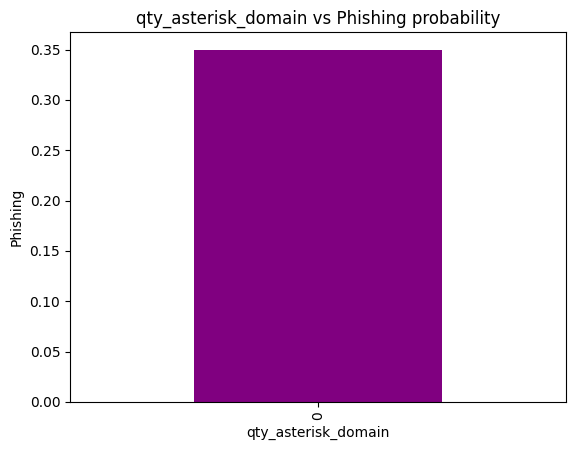

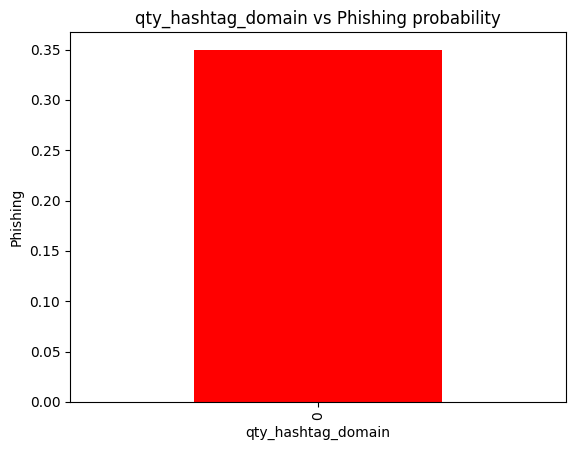

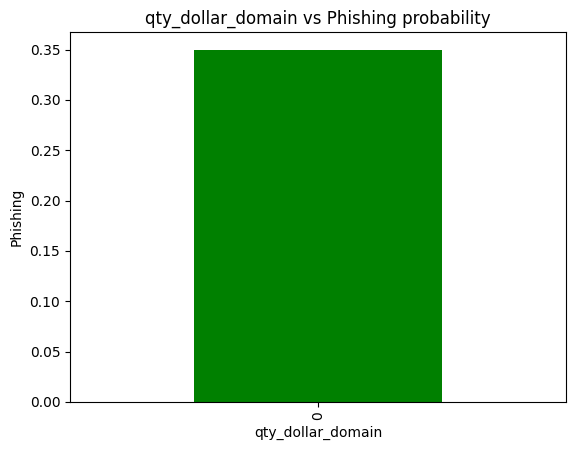

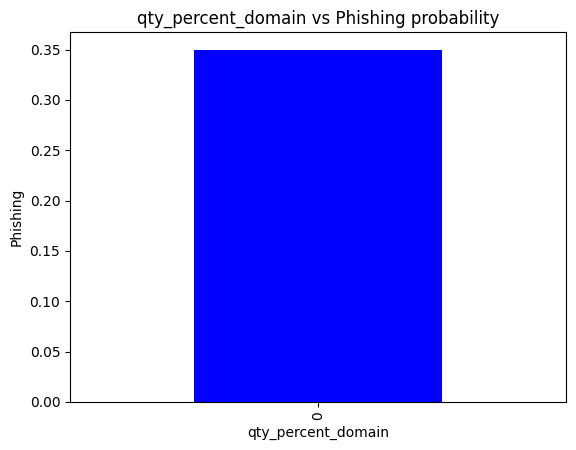

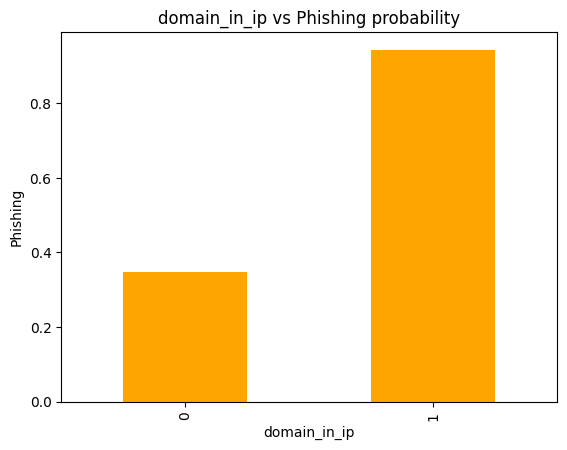

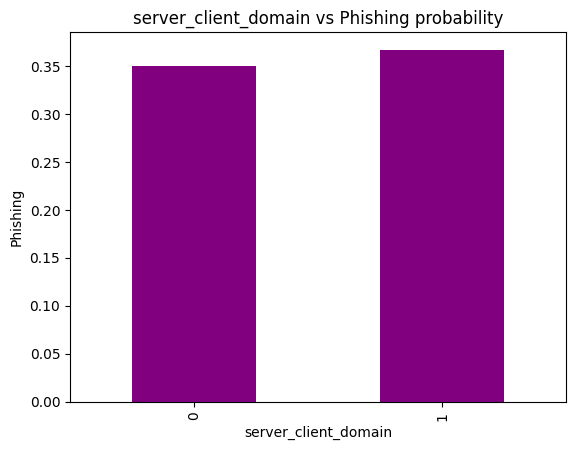

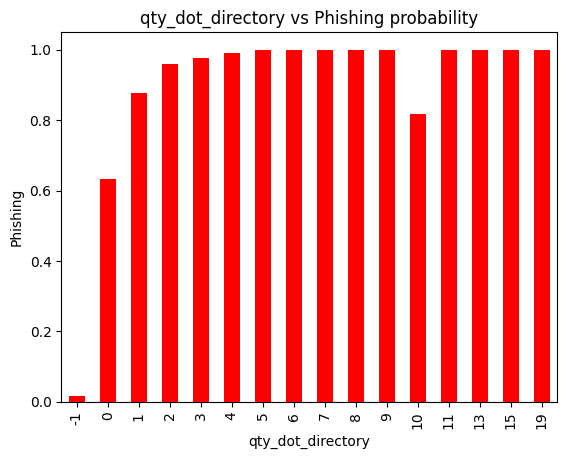

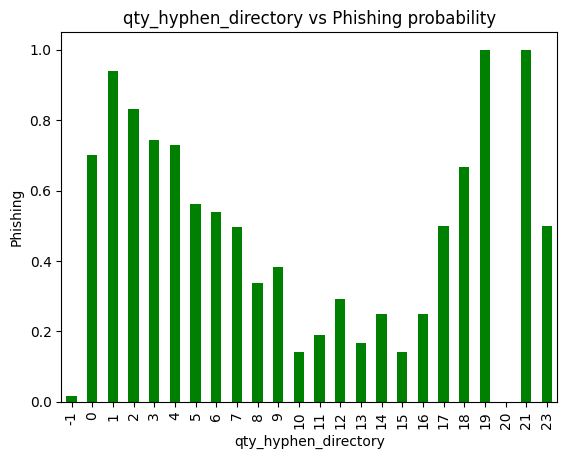

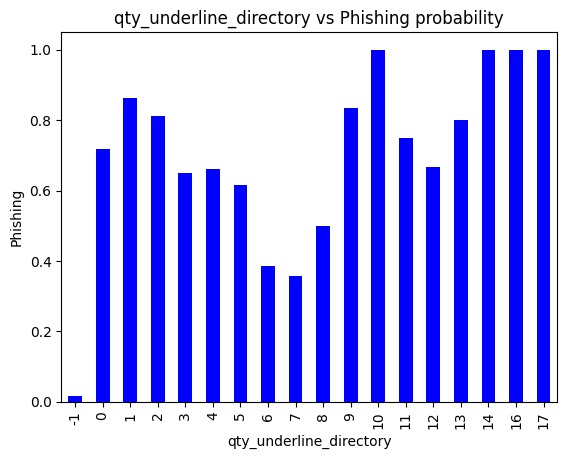

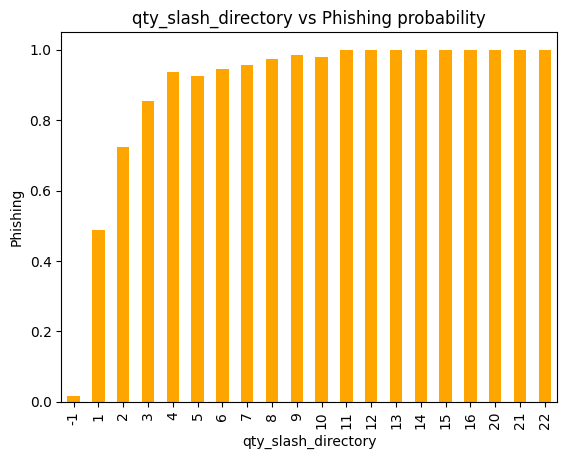

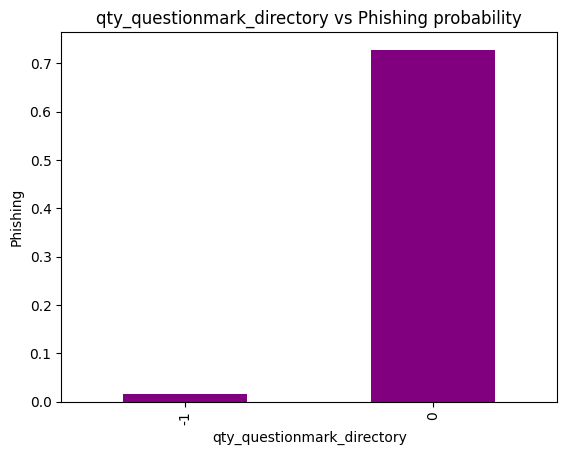

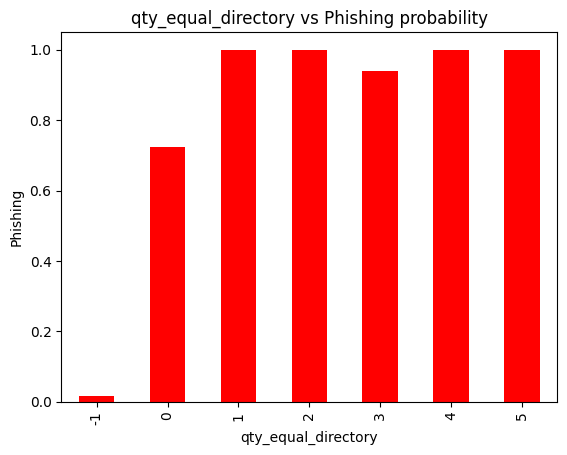

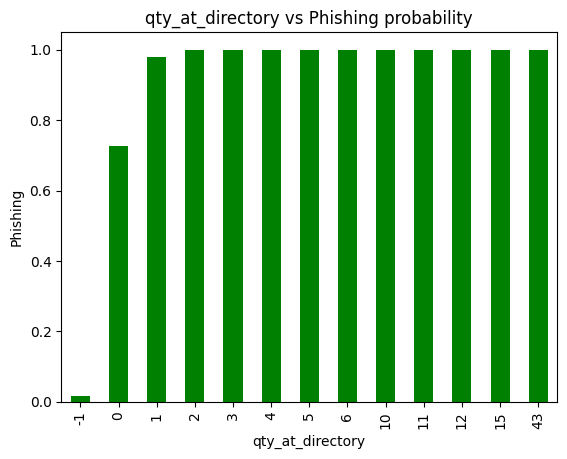

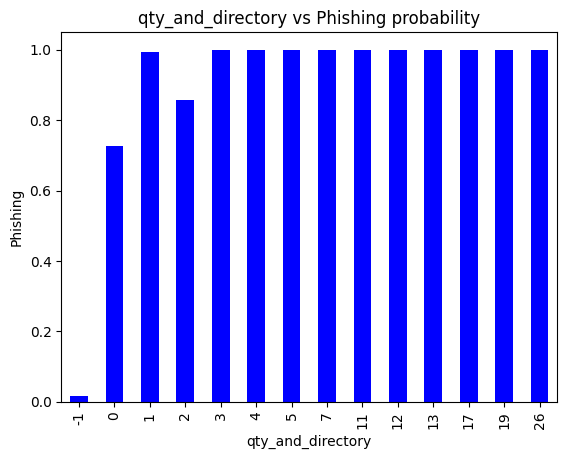

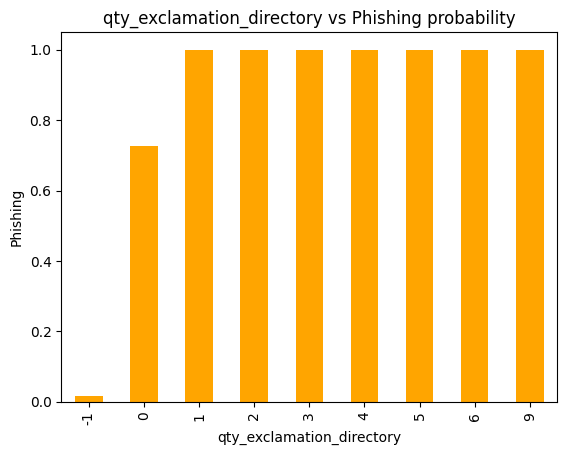

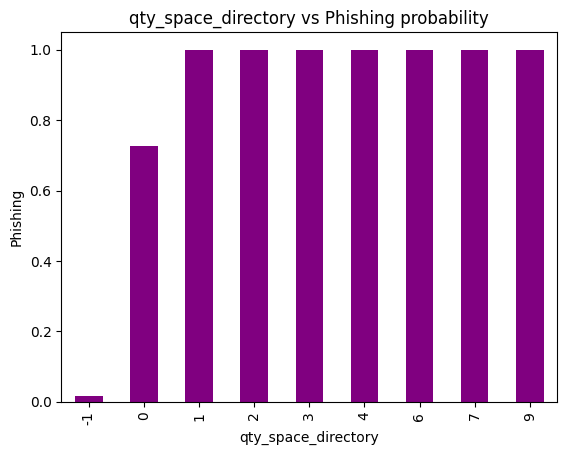

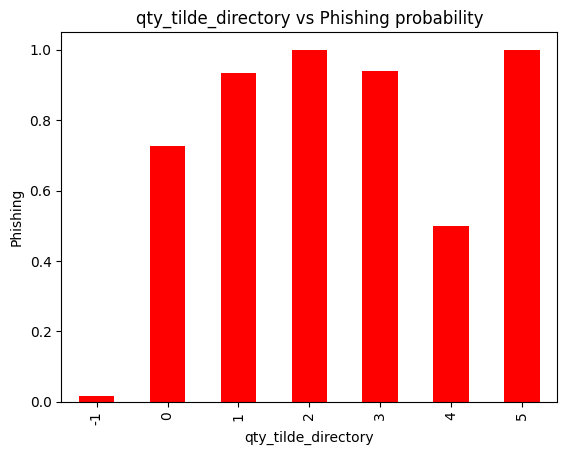

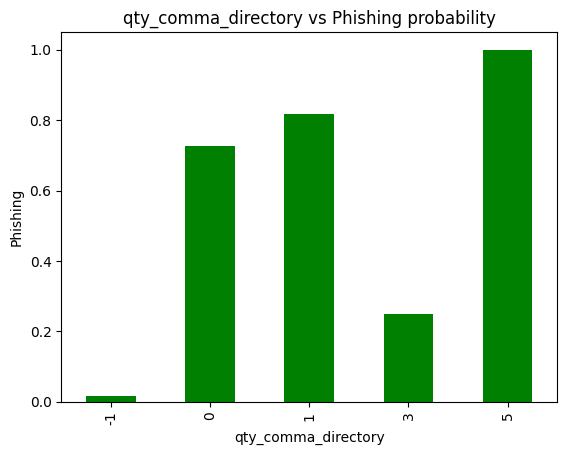

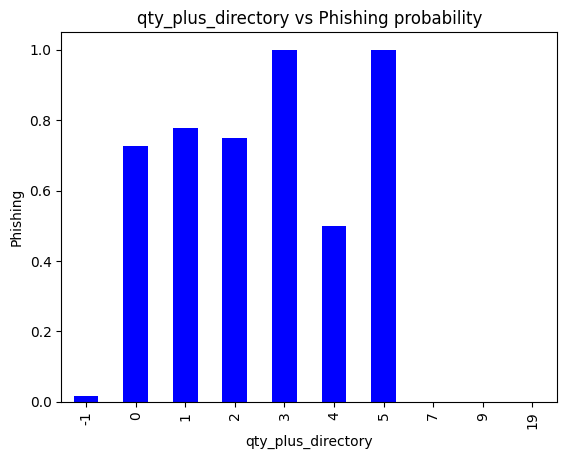

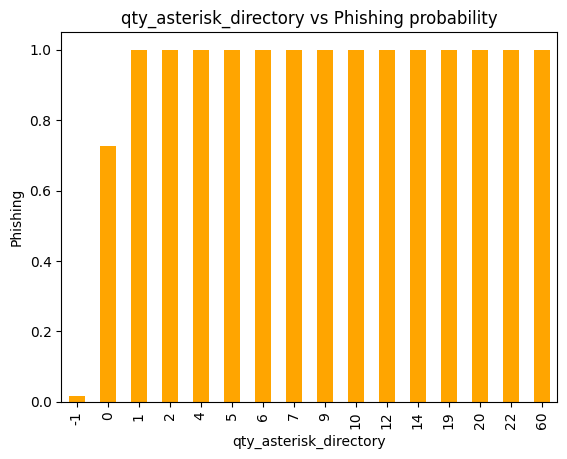

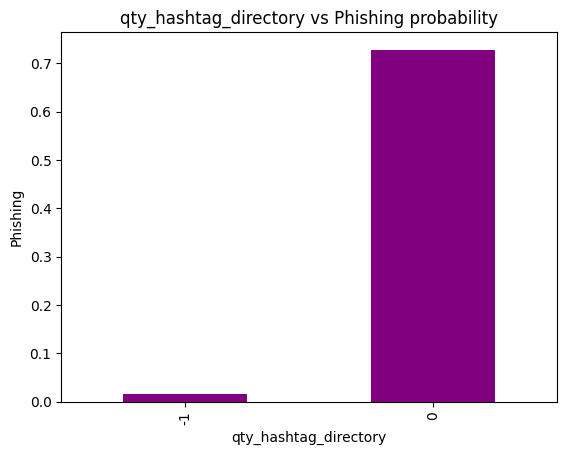

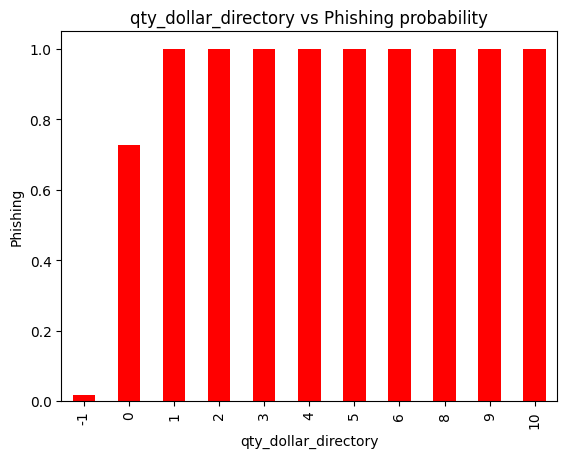

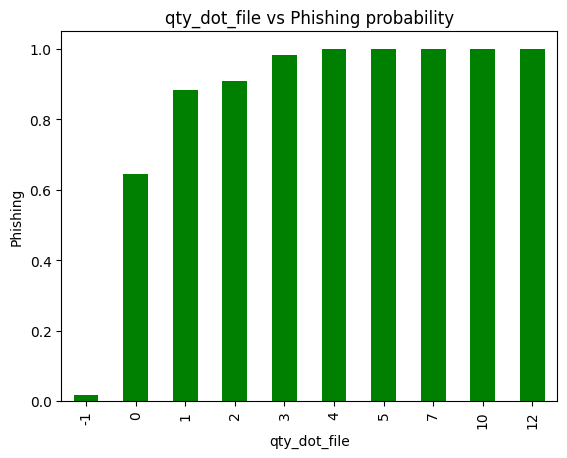

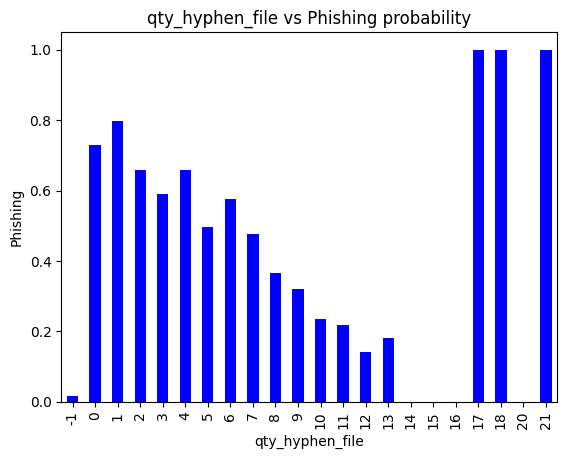

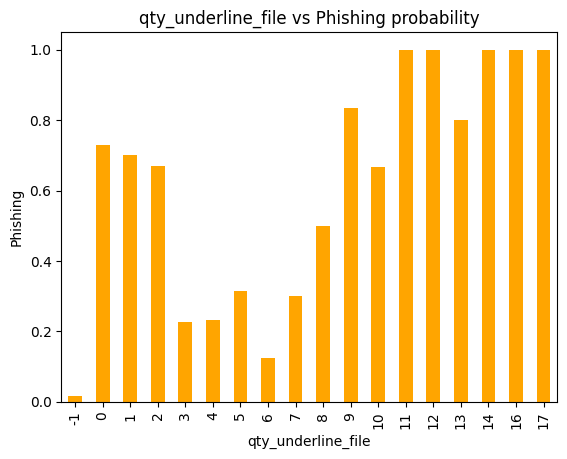

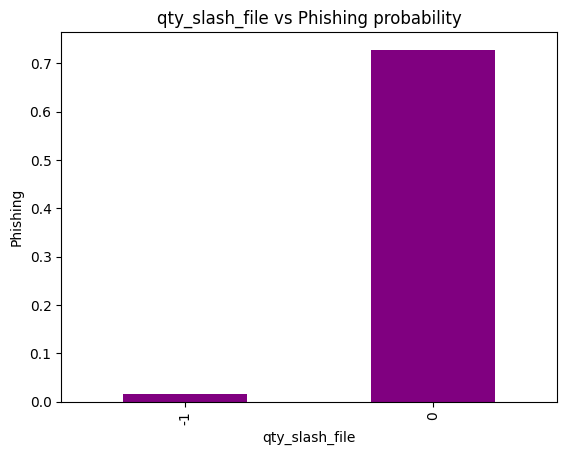

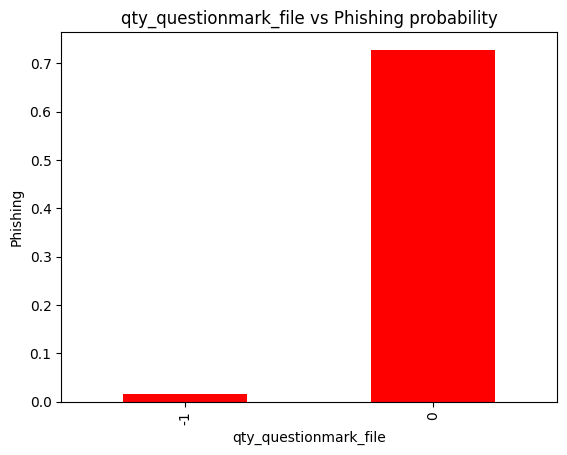

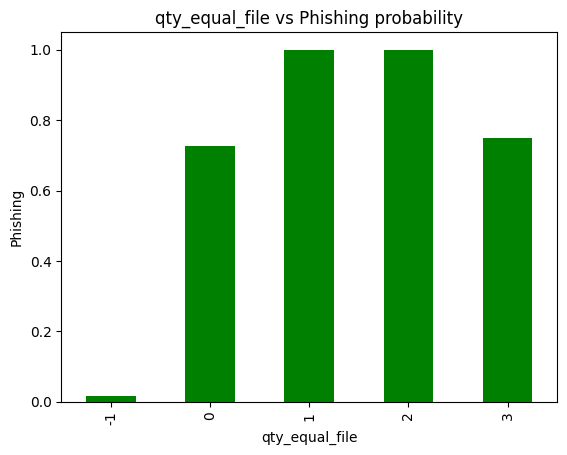

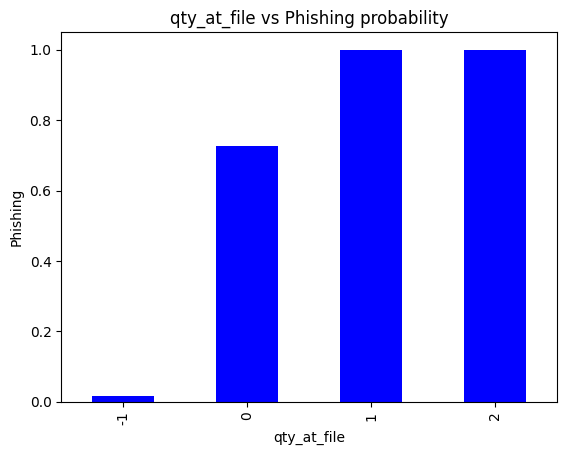

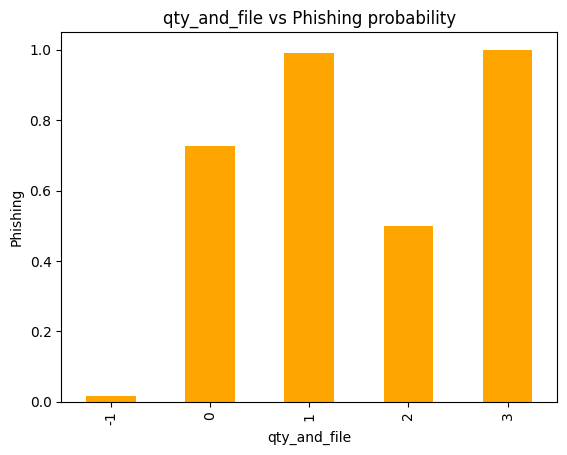

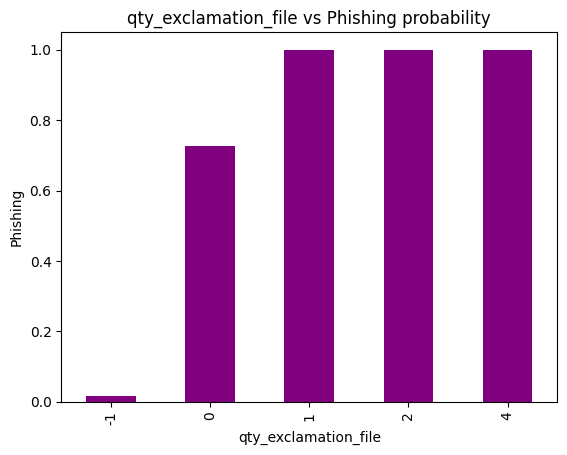

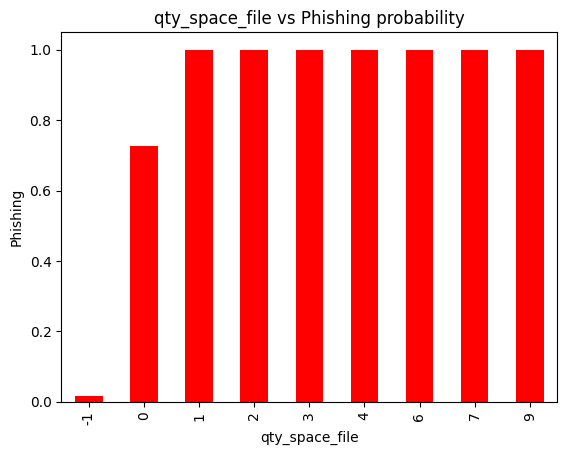

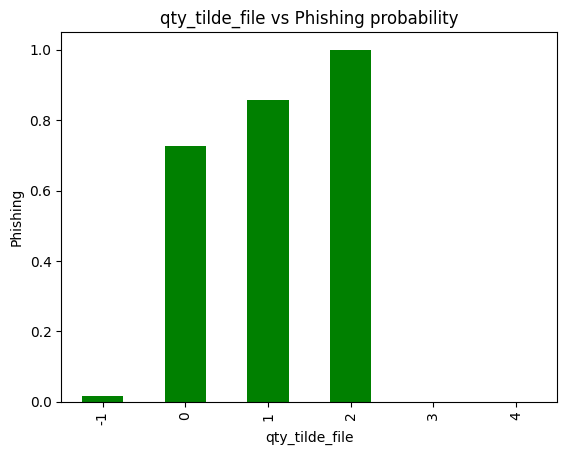

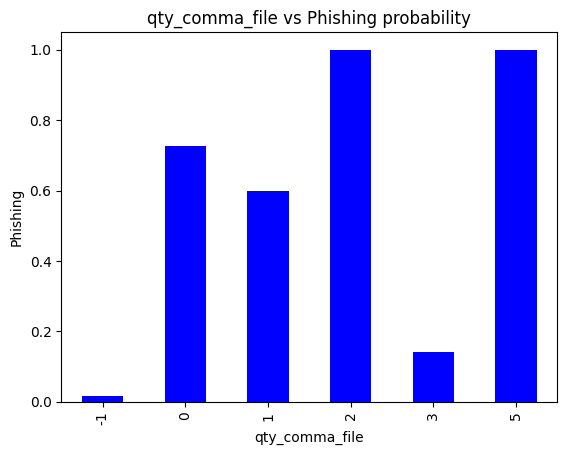

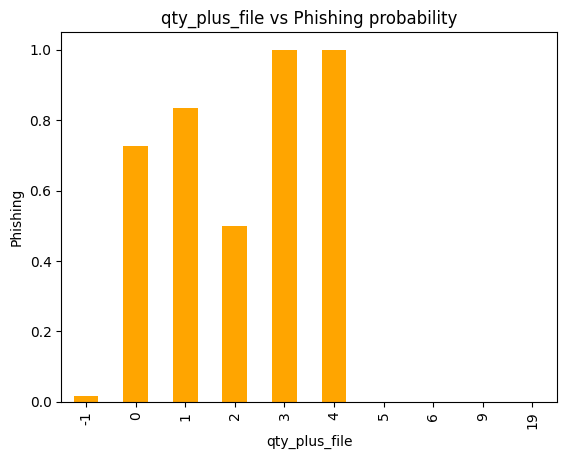

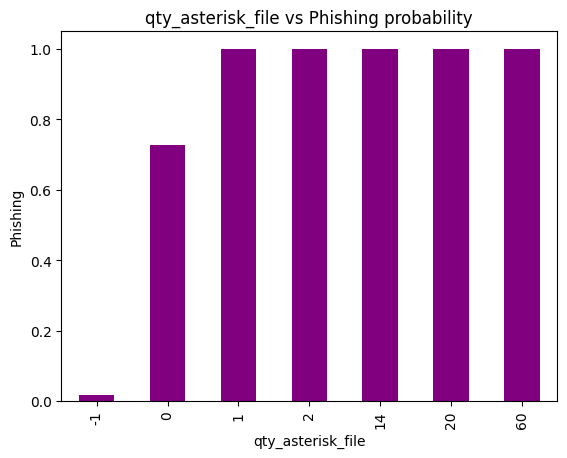

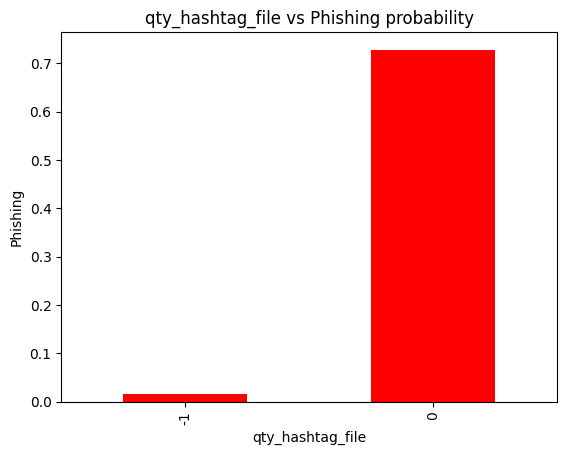

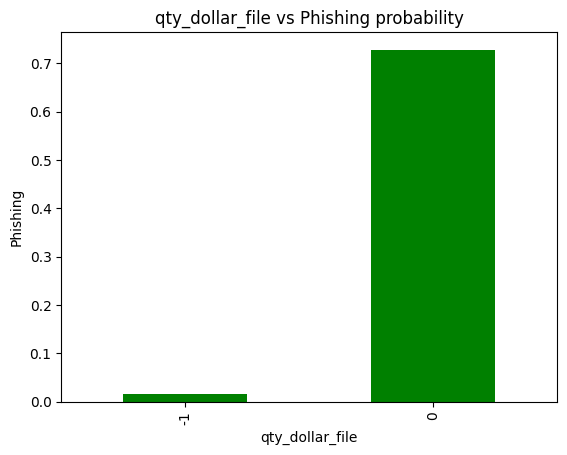

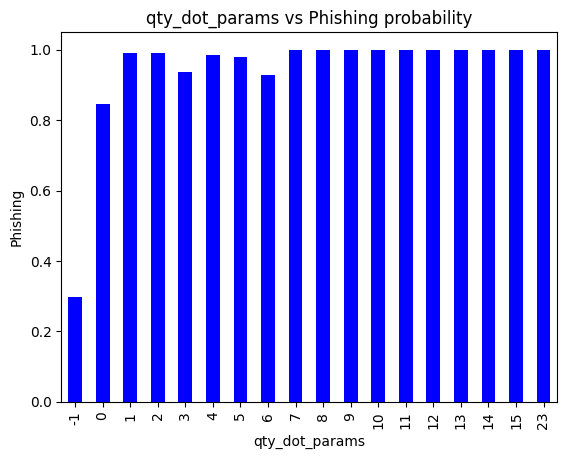

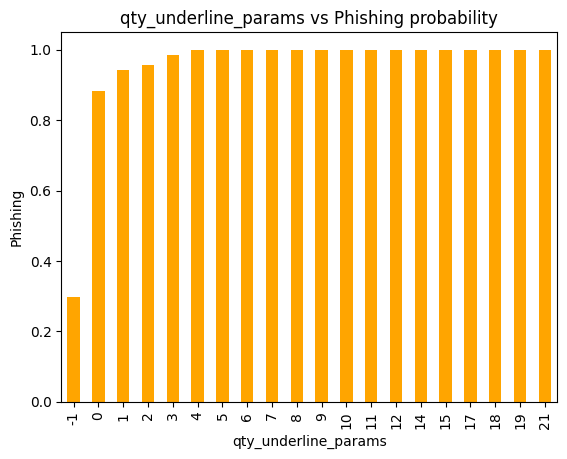

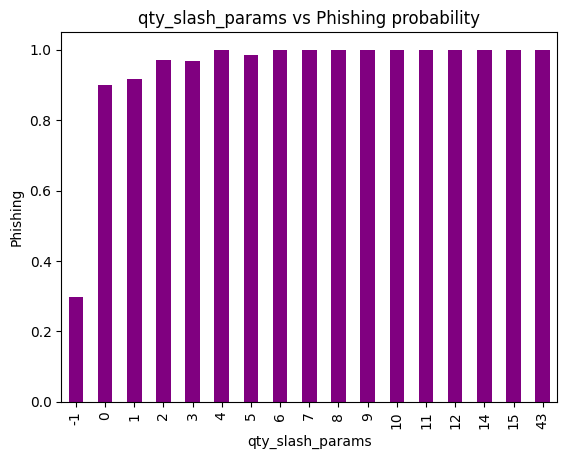

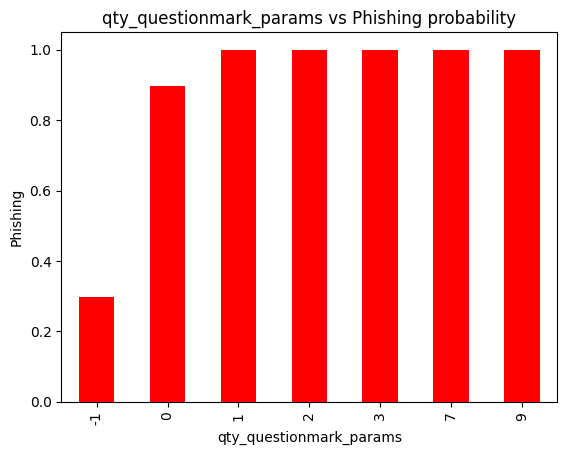

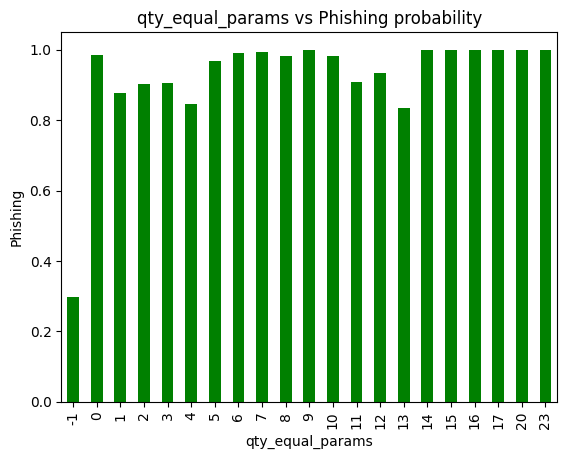

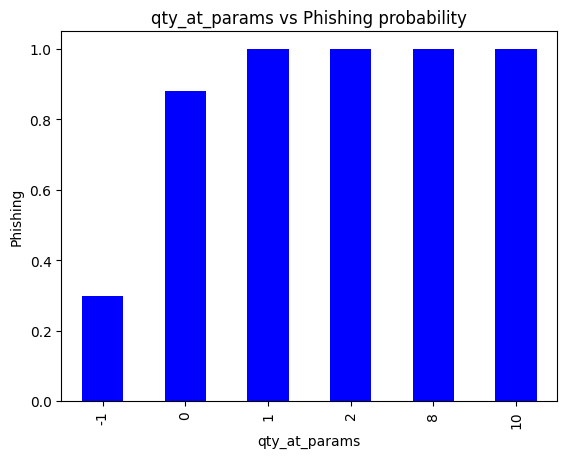

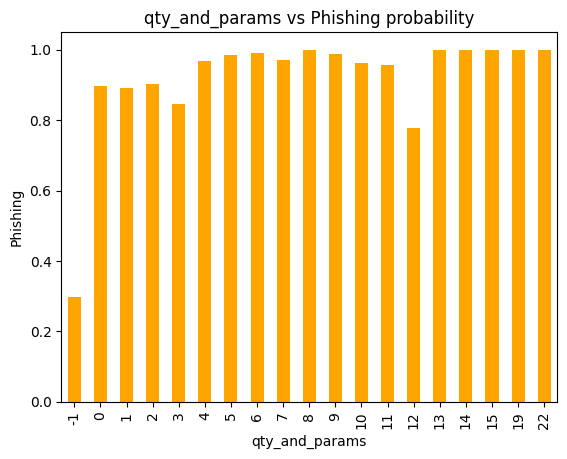

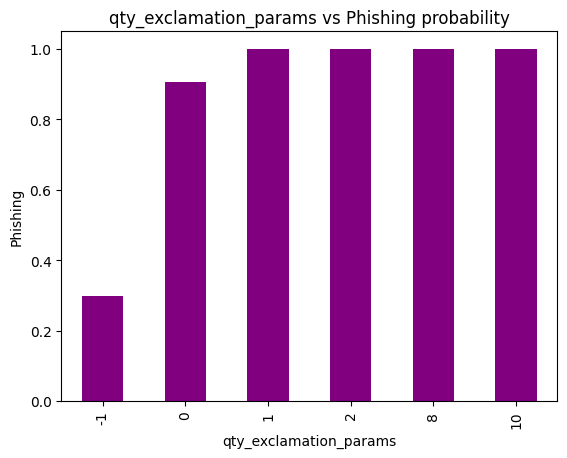

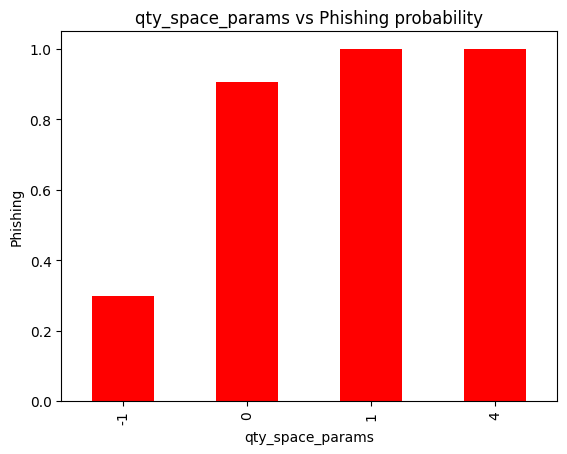

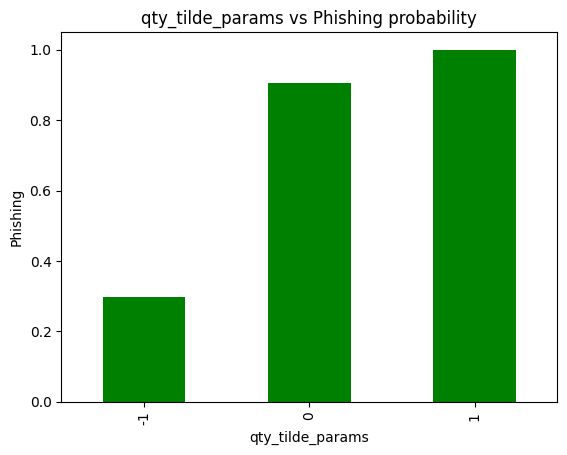

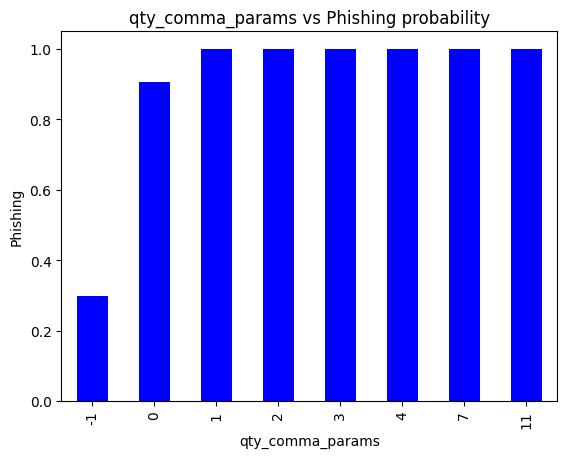

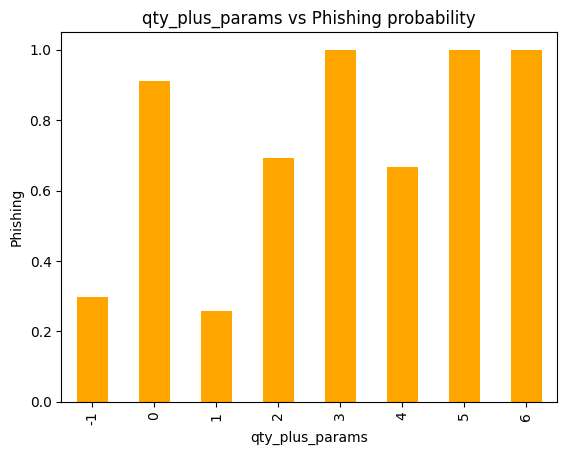

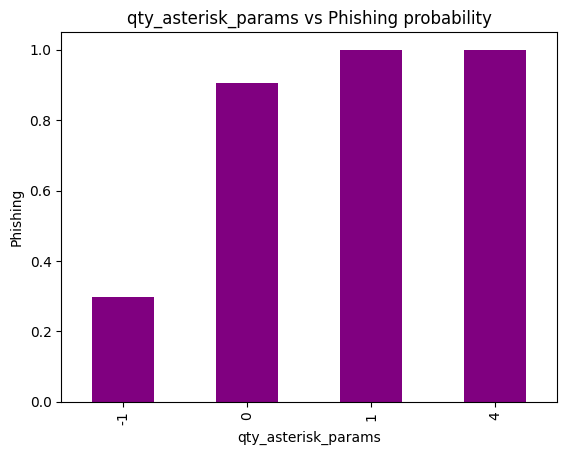

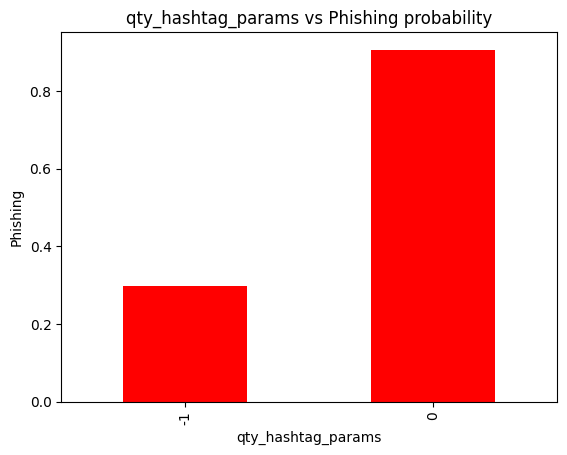

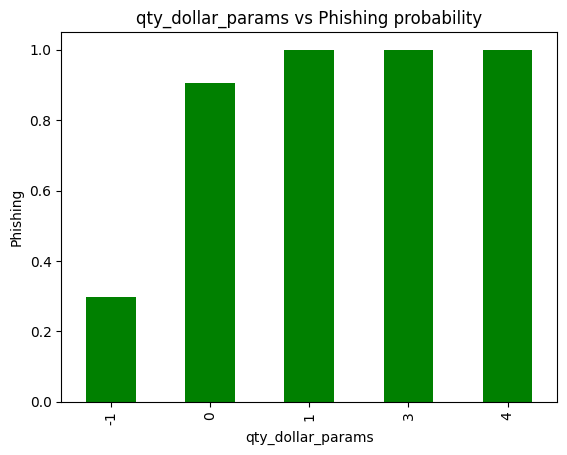

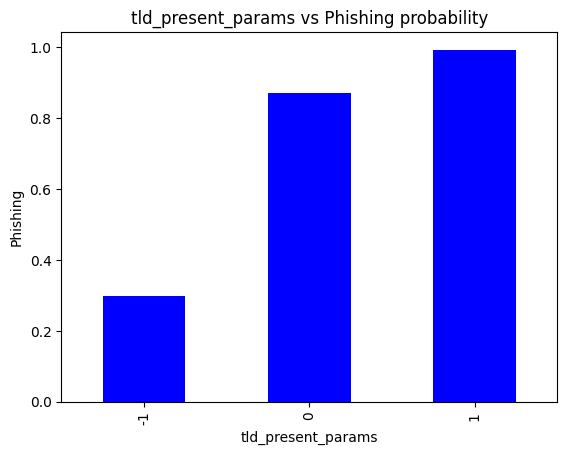

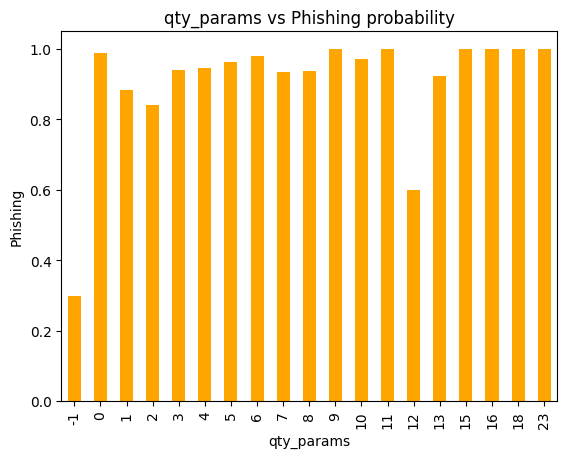

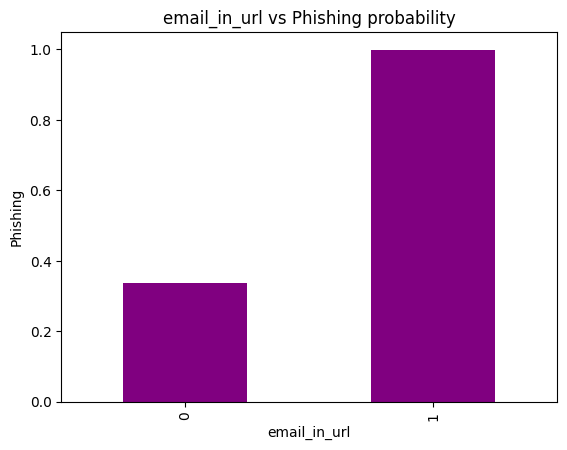

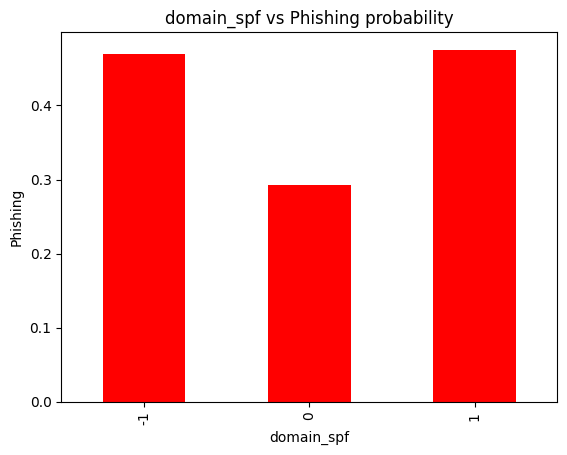

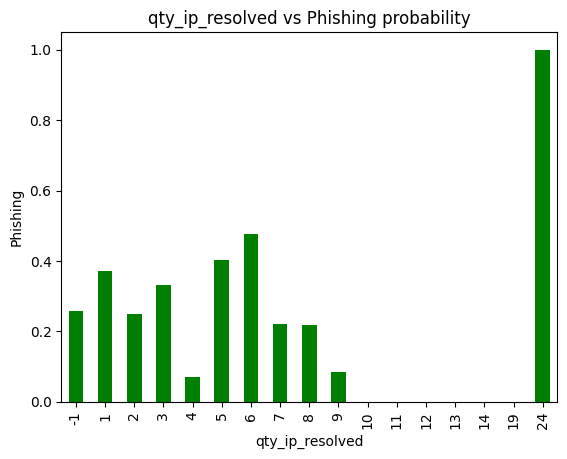

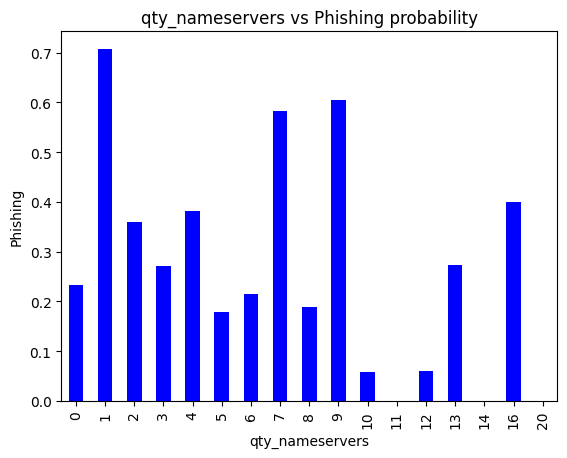

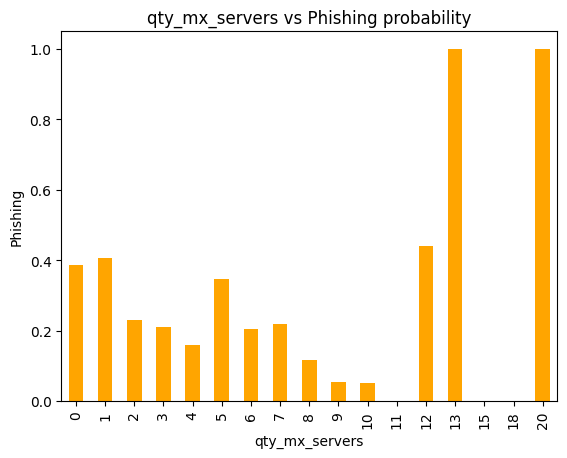

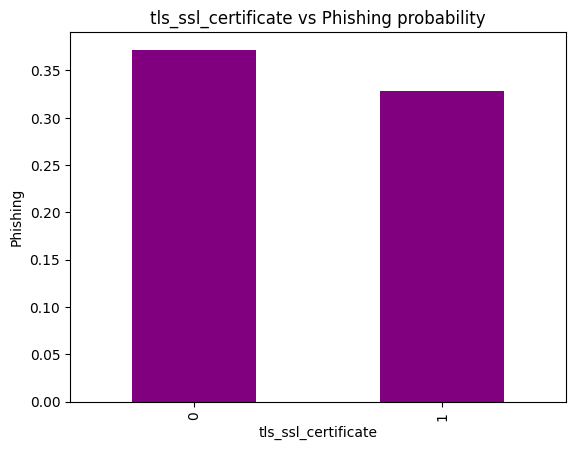

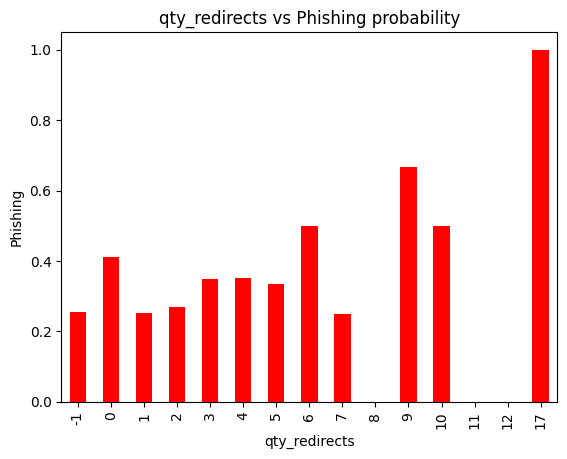

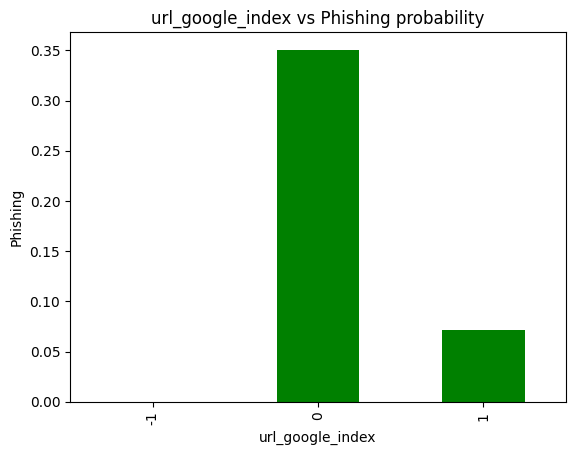

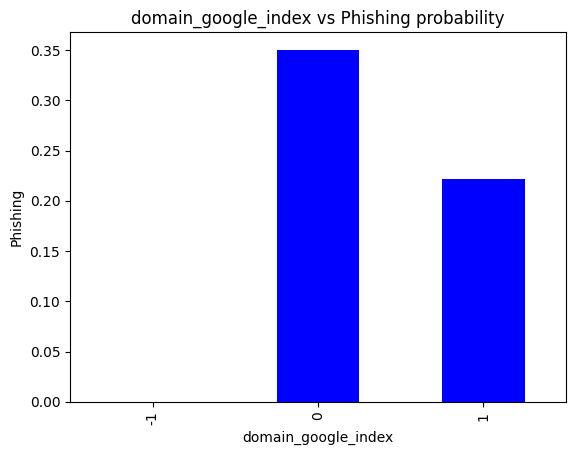

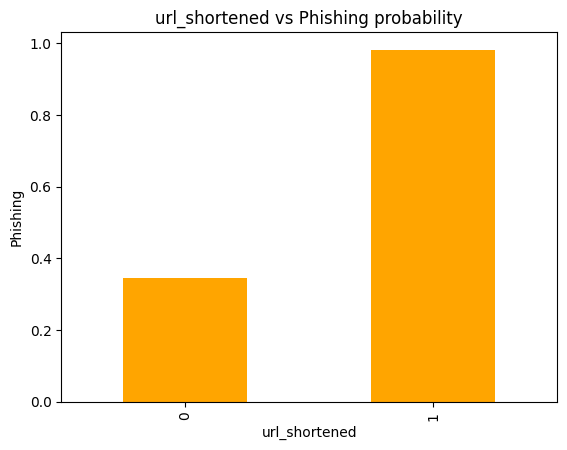

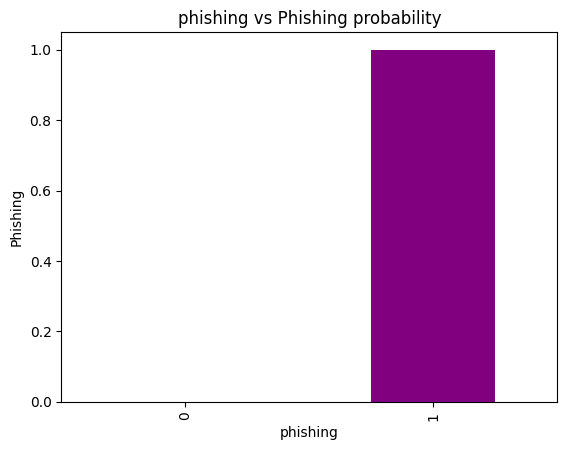

In [143]:
data = df.copy()
# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, feature in enumerate(discrete_features):
    # Generate the bar plot with a specific color
    data.groupby(feature)['phishing'].mean().plot.bar(color=colors[i % len(colors)])
    plt.xlabel(feature)
    plt.ylabel('Phishing')
    plt.title(f"{feature} vs Phishing probability")
    plt.show()

### Observations: Clearly higher the quantity of chars, higher the probability of phishing domain

# Continuous features

In [144]:
continuous_features = list(set(numerical_features) - set(discrete_features))

In [145]:
len(continuous_features)

17

In [146]:
continuous_features

['qty_percent_params',
 'time_domain_expiration',
 'params_length',
 'qty_percent_directory',
 'qty_percent_url',
 'domain_length',
 'asn_ip',
 'time_domain_activation',
 'qty_vowels_domain',
 'qty_hyphen_params',
 'ttl_hostname',
 'qty_percent_file',
 'directory_length',
 'qty_hyphen_url',
 'file_length',
 'length_url',
 'time_response']

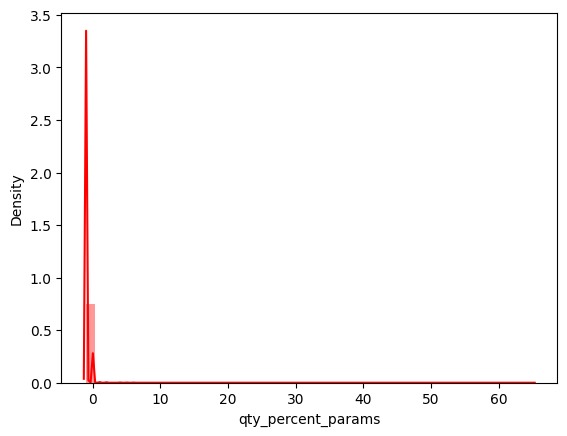

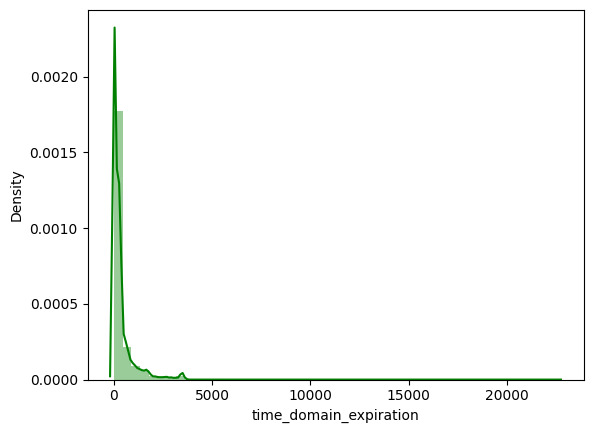

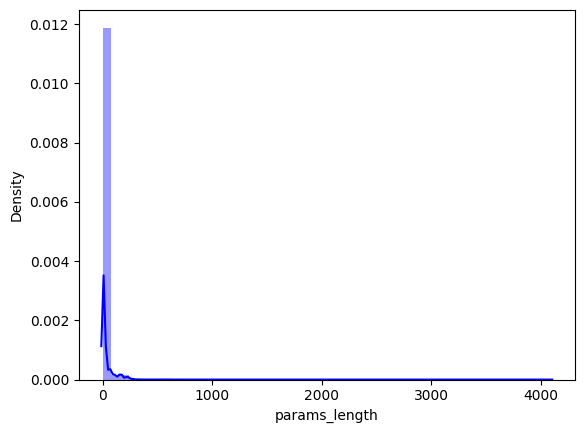

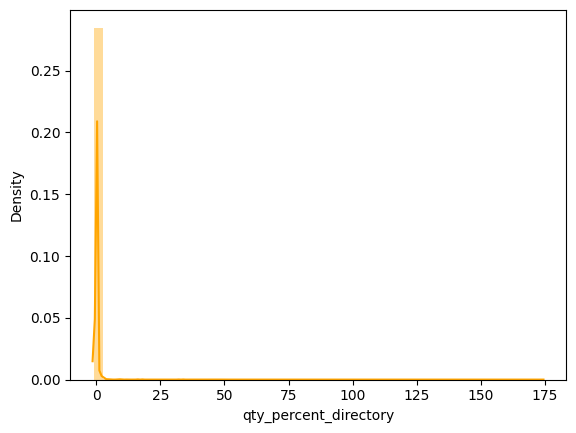

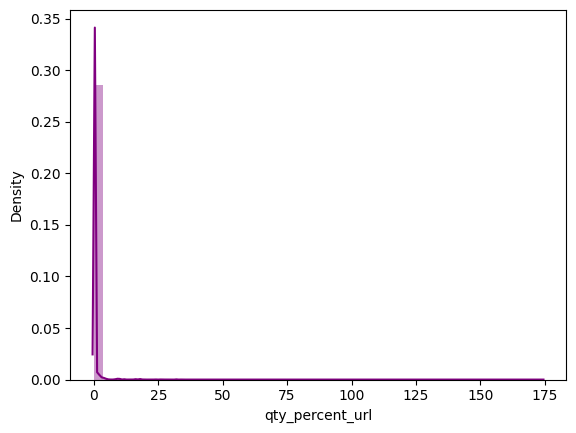

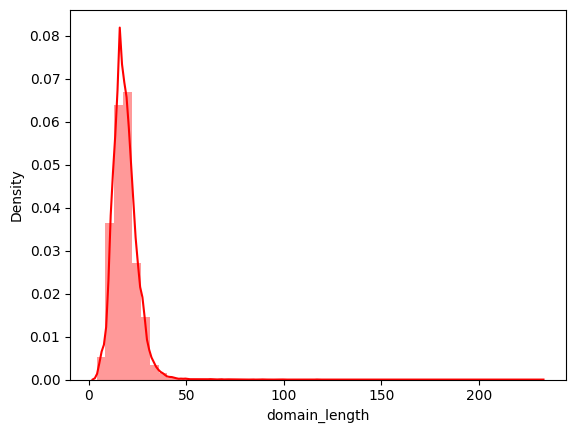

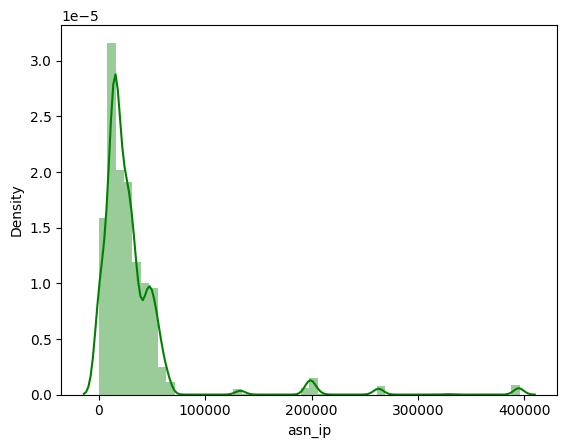

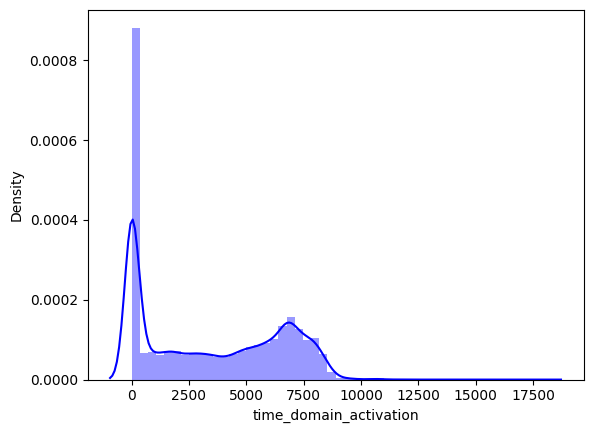

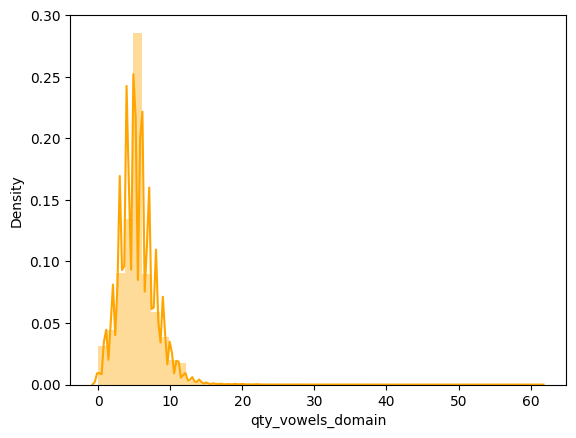

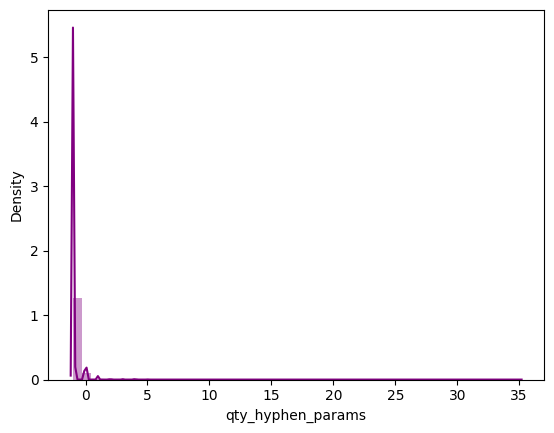

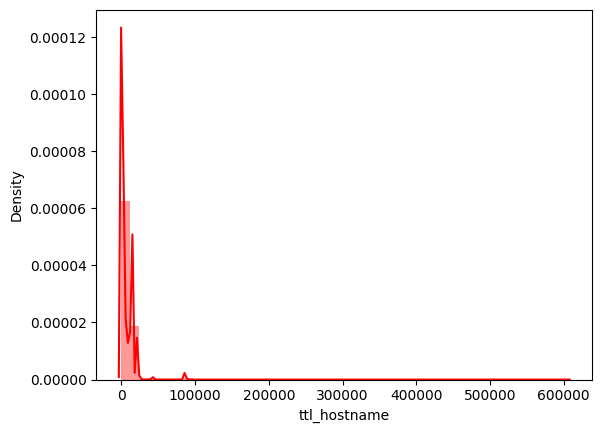

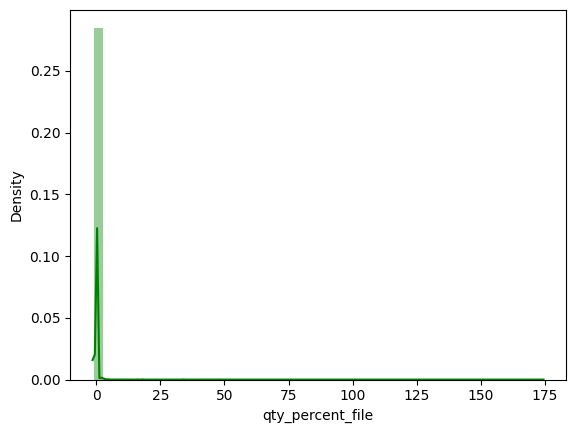

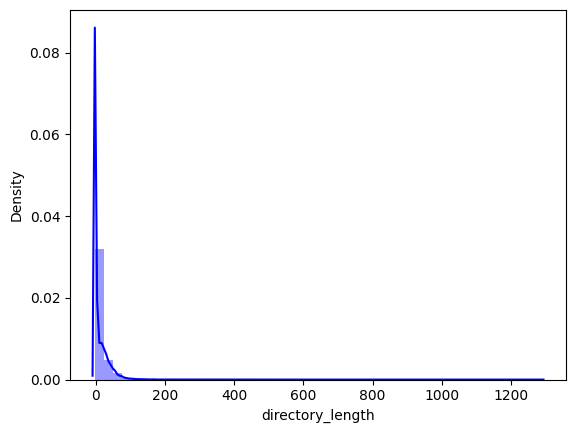

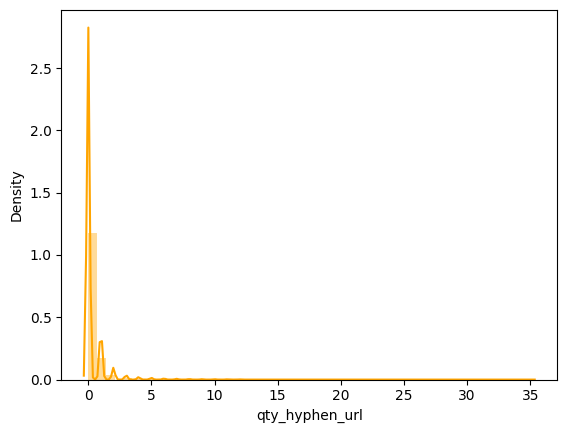

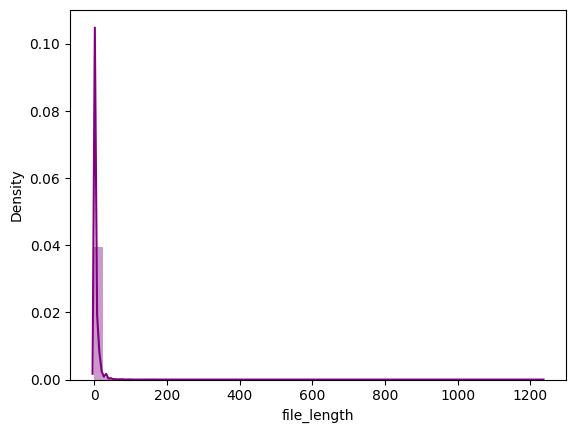

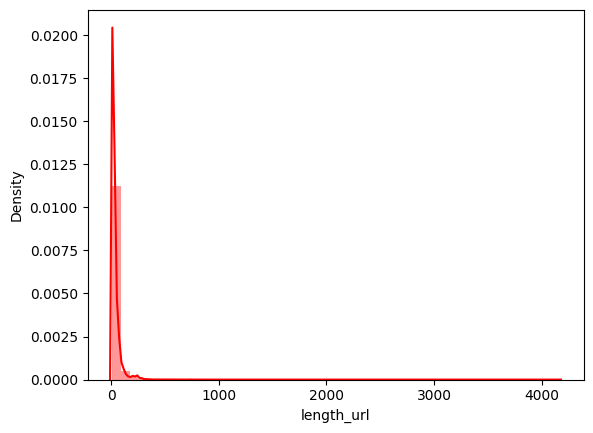

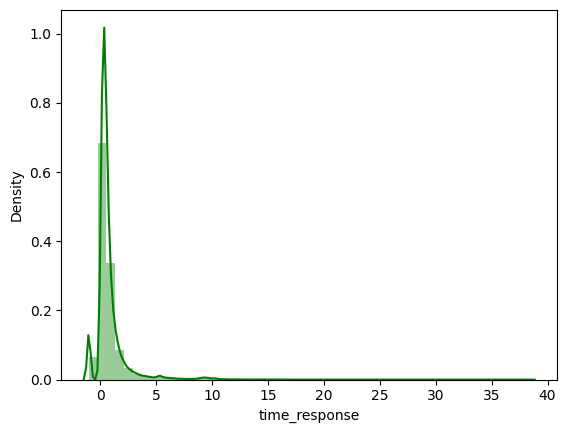

In [147]:
data = df.copy()
# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
for feature in continuous_features:
    sns.distplot(data[feature],color=colors[i%len(colors)])
    plt.show()
    i+=1

# Log Transformation:
- Skewness correction
- Variance stabilization
- Linearization
- prices or incomes

In [148]:
import scipy.stats as stat
import pylab

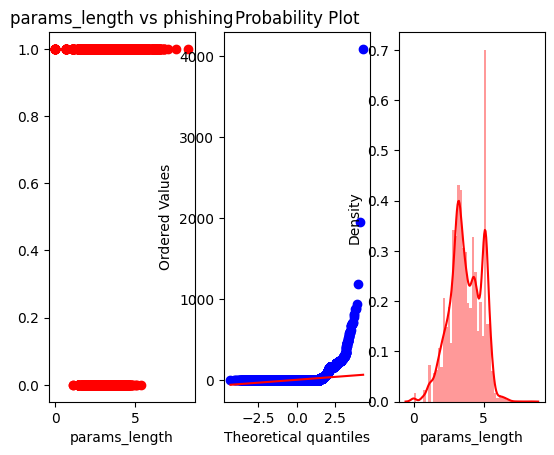

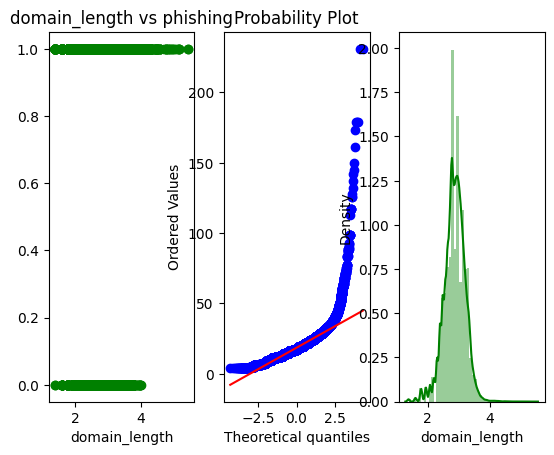

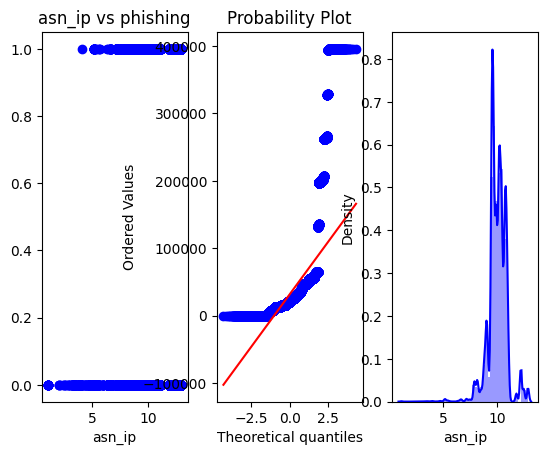

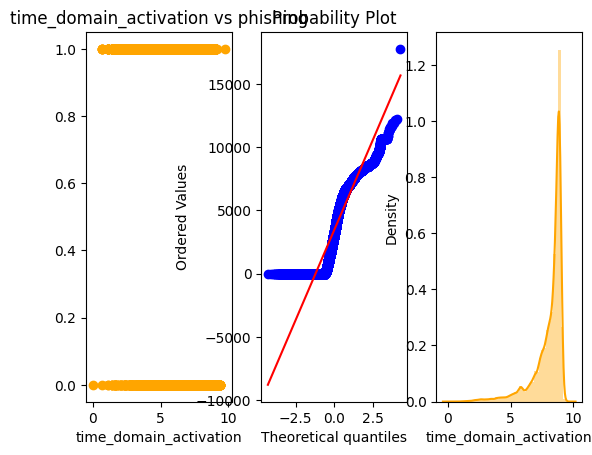

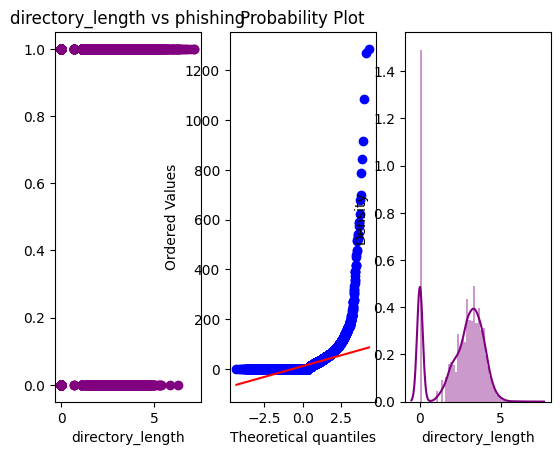

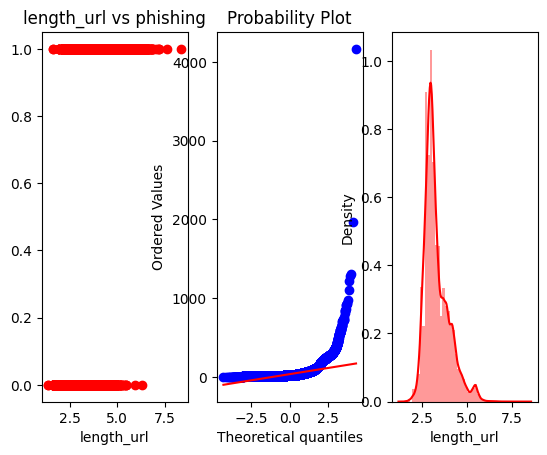

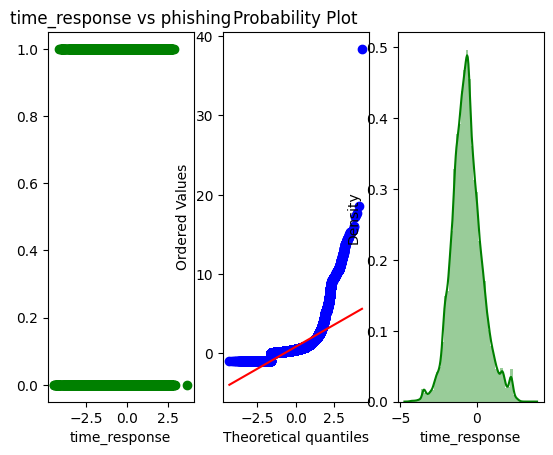

In [149]:
data = df.copy()

# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
n=len(colors)

for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(df[feature])
        plt.subplot(1,3,1)
        plt.scatter(data[feature],data['phishing'],color=colors[i%n])
        plt.xlabel(feature)

        plt.title(f"{feature} vs phishing")
        plt.subplot(1,3,2)
        stat.probplot(df[feature],dist='norm',plot=pylab)

        plt.subplot(1,3,3)
        sns.distplot(data[feature],color=colors[i%n])
        plt.show()
        i+=1

# Reciprocal Transformation:
- Handling data with a right-skewed distribution
- Linearization
- Stabilizing the variance
- Interpreting rates or ratios(speed, time, frequency)

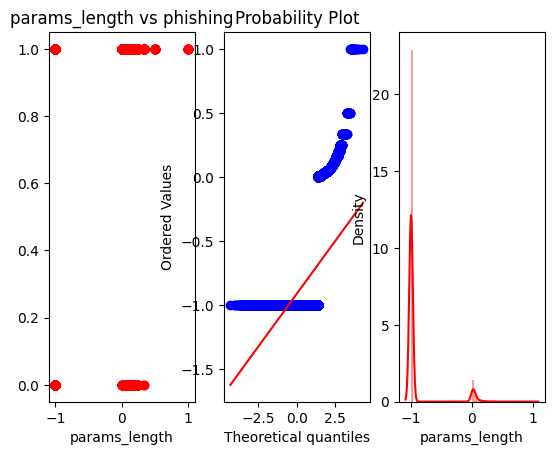

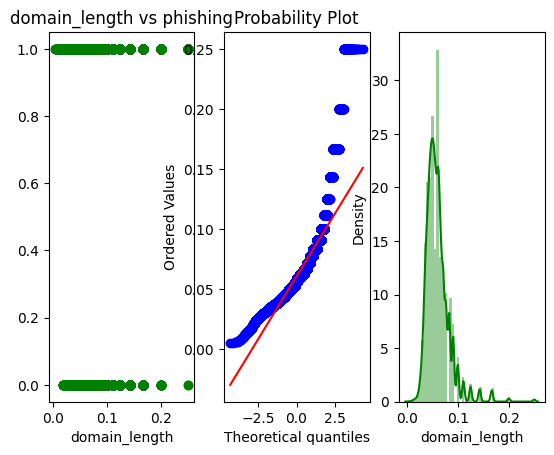

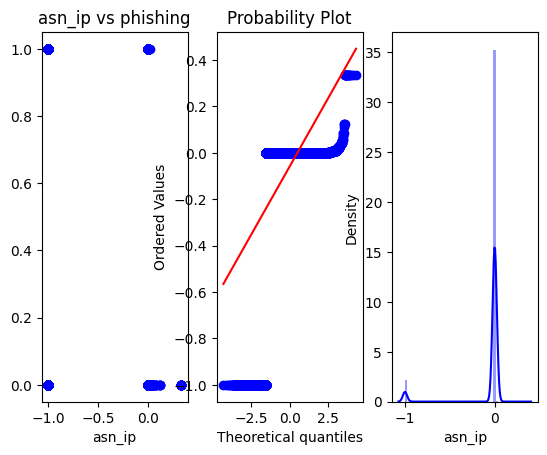

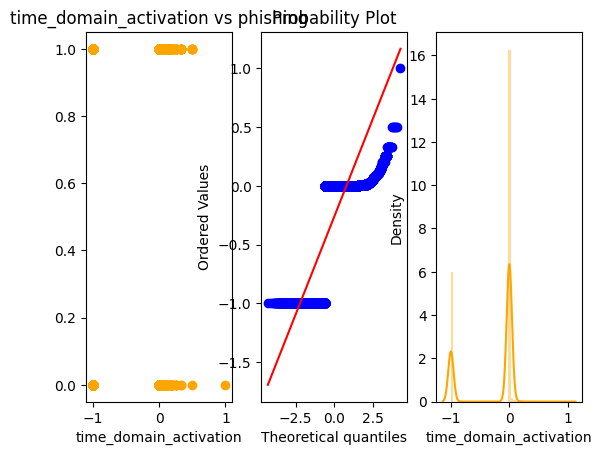

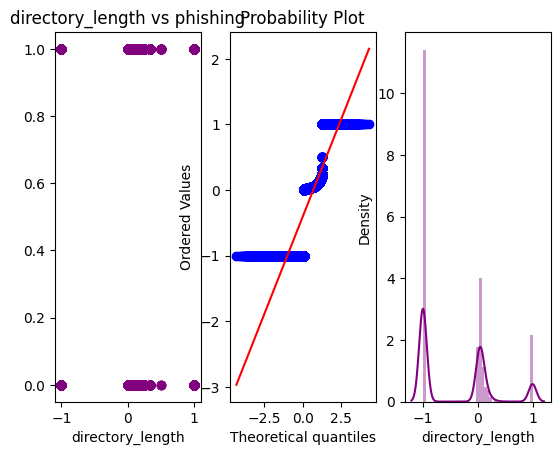

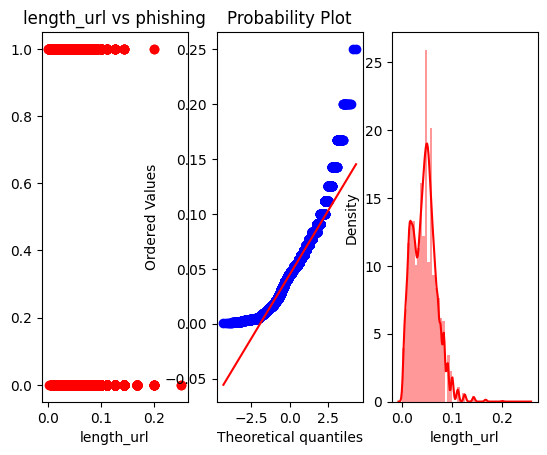

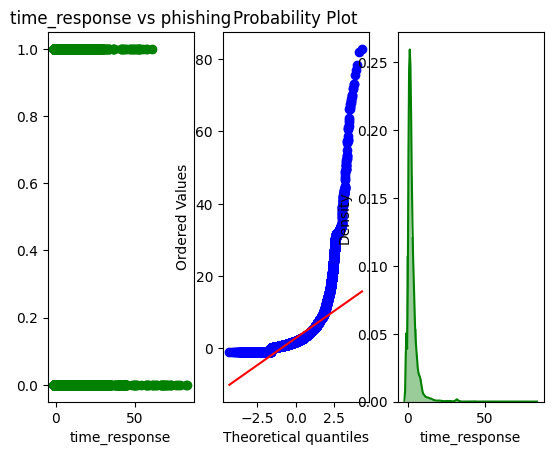

In [150]:
data = df.copy()

# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
n=len(colors)

for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = 1/df[feature]
        plt.subplot(1,3,1)
        plt.scatter(data[feature],data['phishing'],color=colors[i%len(colors)])
        plt.xlabel(feature)

        plt.title(f"{feature} vs phishing")
        plt.subplot(1,3,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)

        plt.subplot(1,3,3)
        sns.distplot(data[feature],color=colors[i%len(colors)])
        plt.show()
        i+=1

# Square root transformations

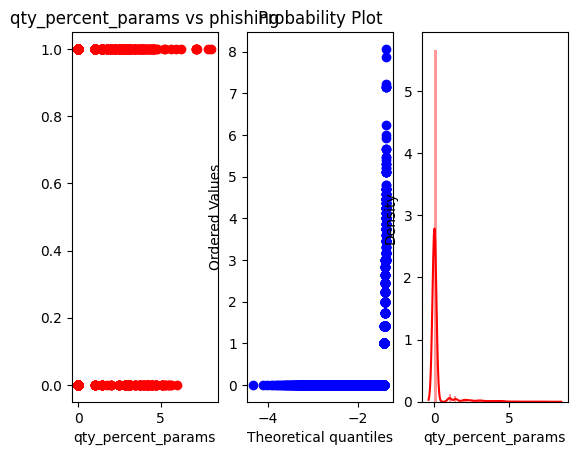

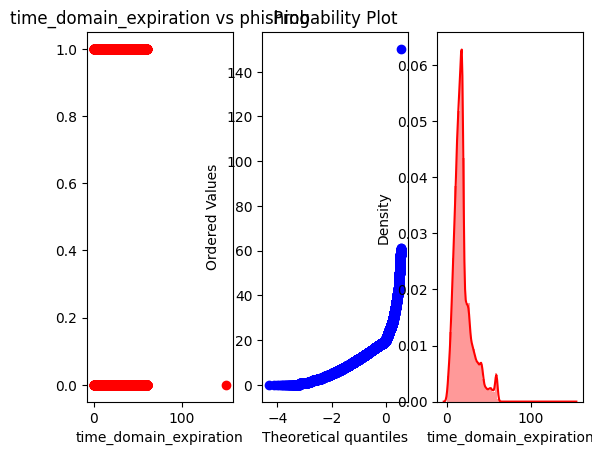

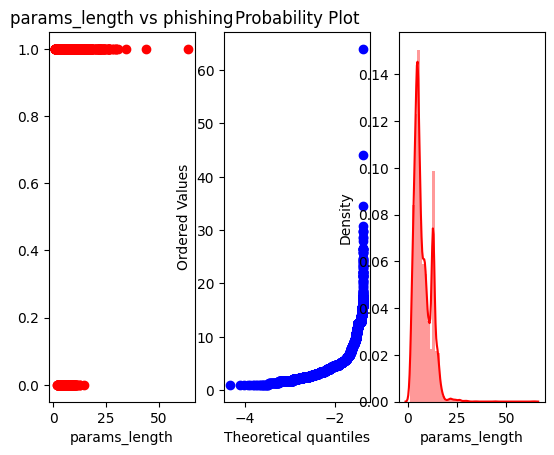

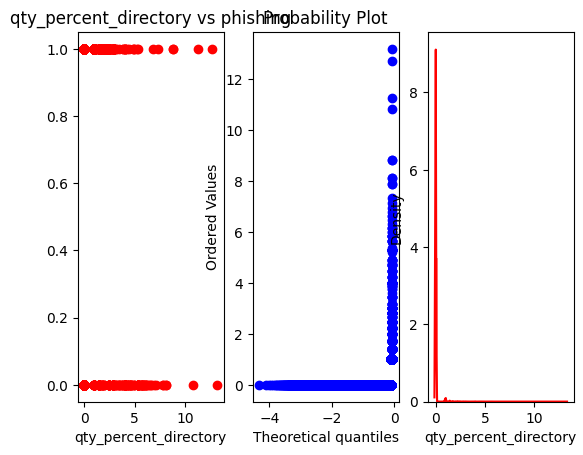

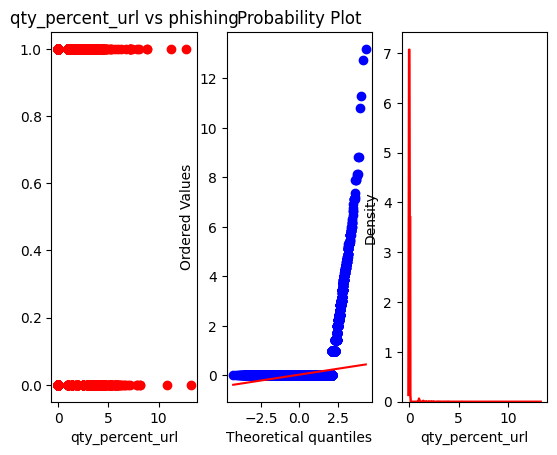

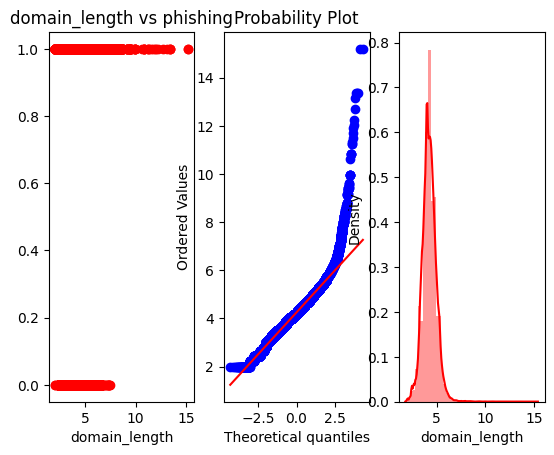

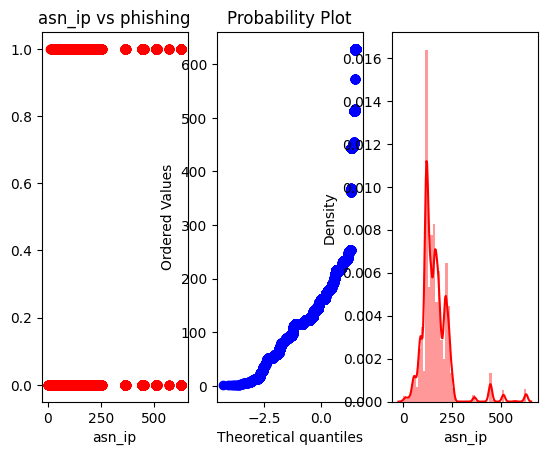

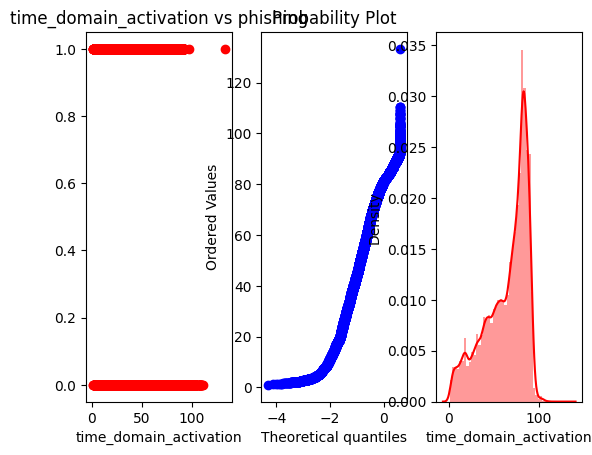

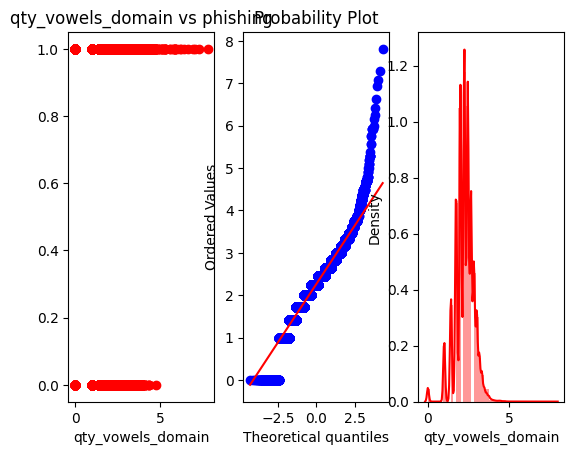

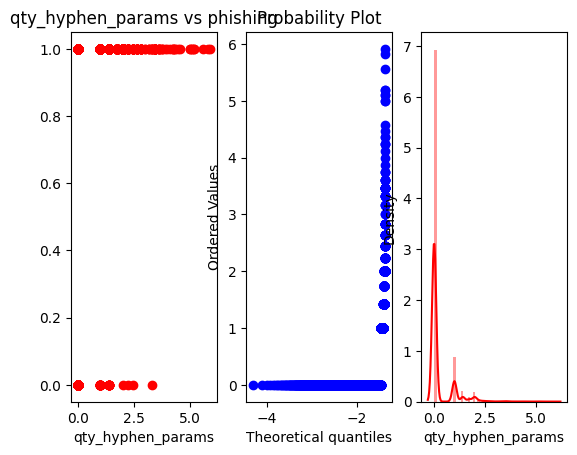

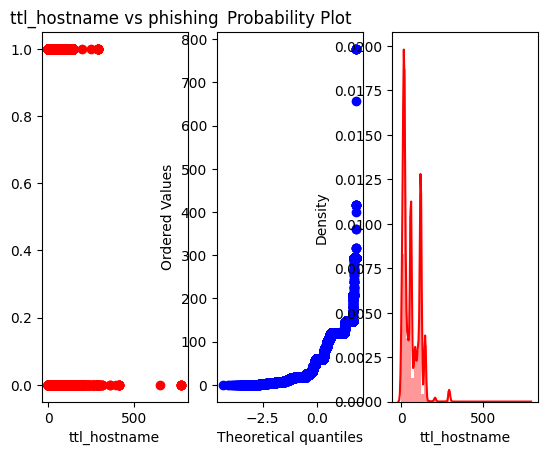

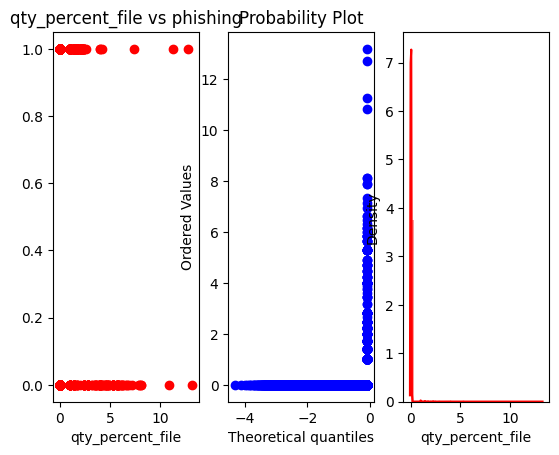

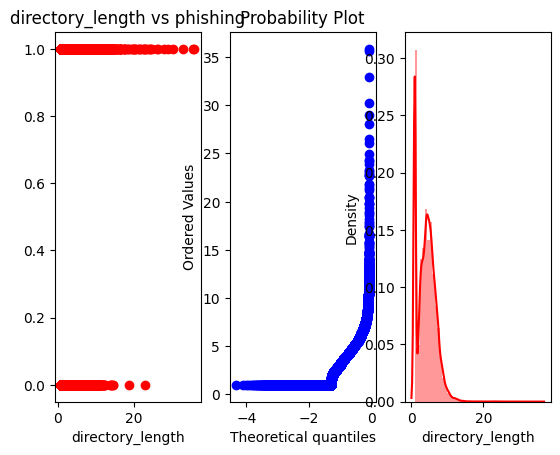

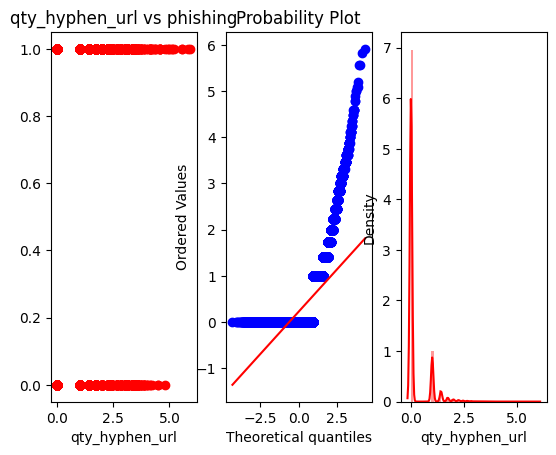

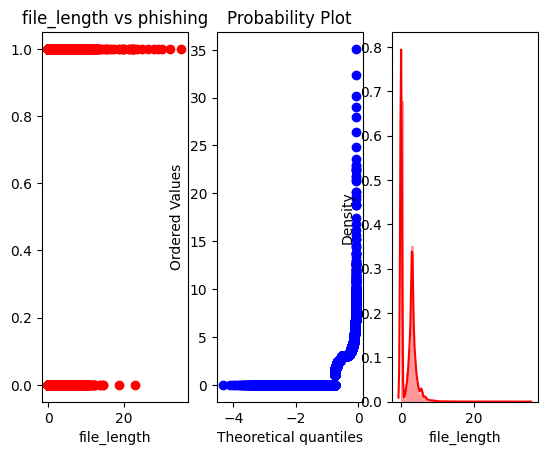

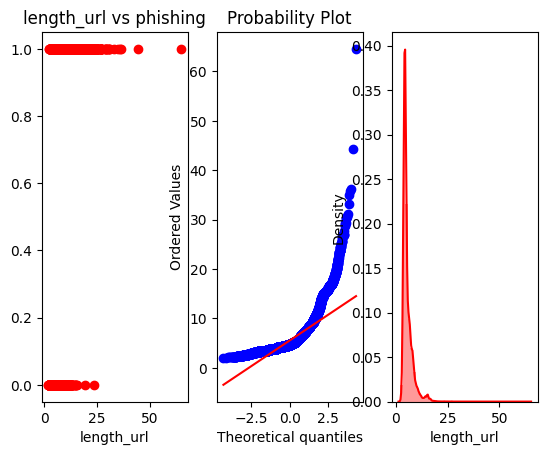

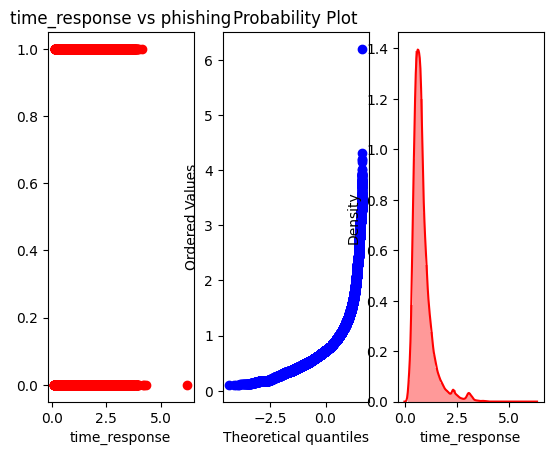

In [151]:
data = df.copy()

# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
n=len(colors)

for feature in continuous_features:

    data[feature] = np.sqrt(df[feature])
    plt.subplot(1,3,1)
    plt.scatter(data[feature],data['phishing'],color=colors[i%len(colors)])
    plt.xlabel(feature)

    plt.title(f"{feature} vs phishing")
    plt.subplot(1,3,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

    plt.subplot(1,3,3)
    sns.distplot(data[feature],color=colors[i%len(colors)])
    plt.show()

# Exponential

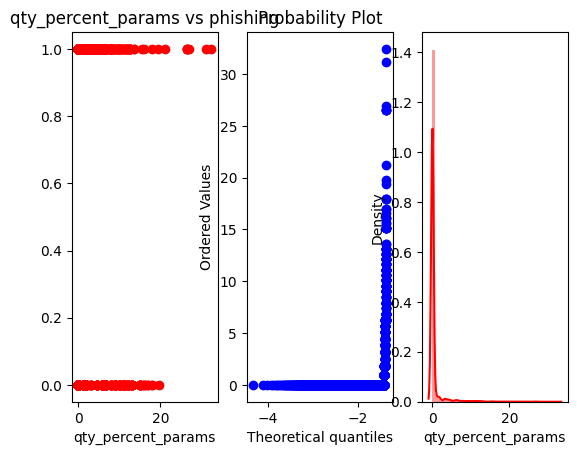

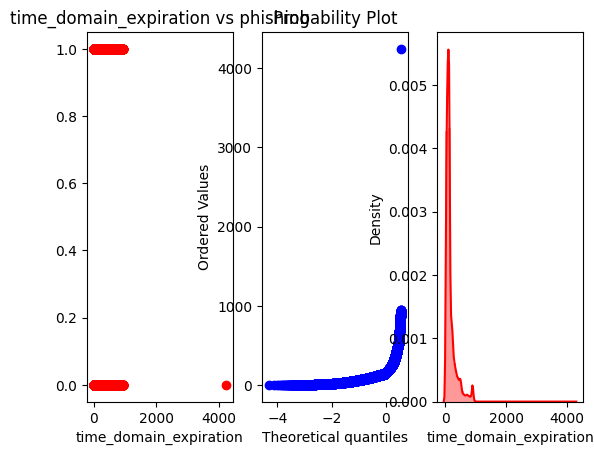

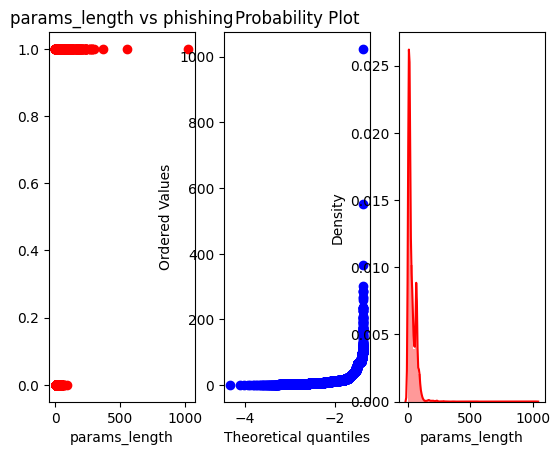

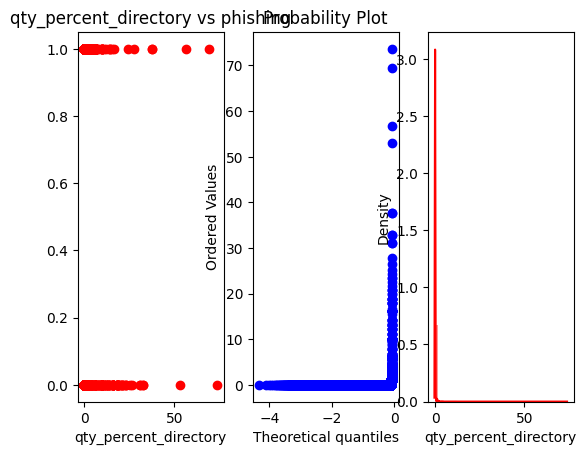

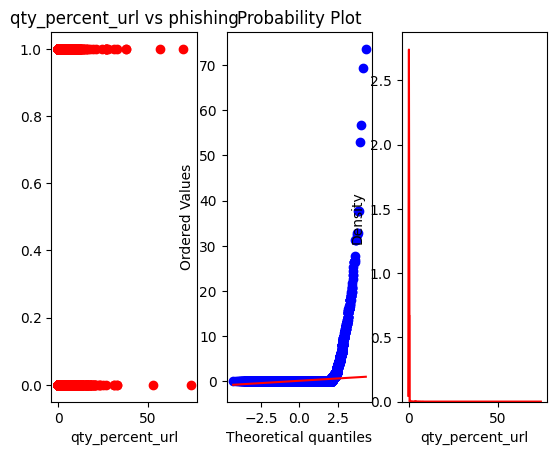

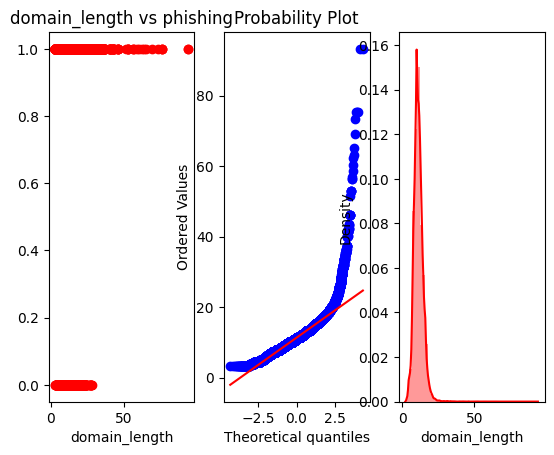

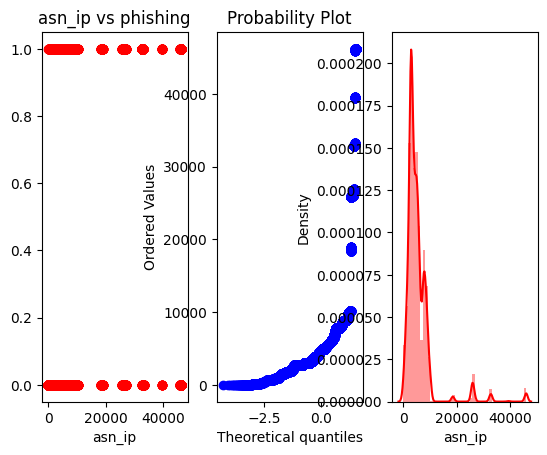

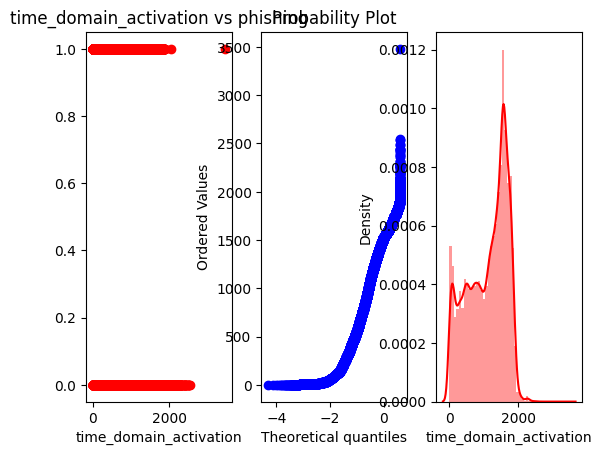

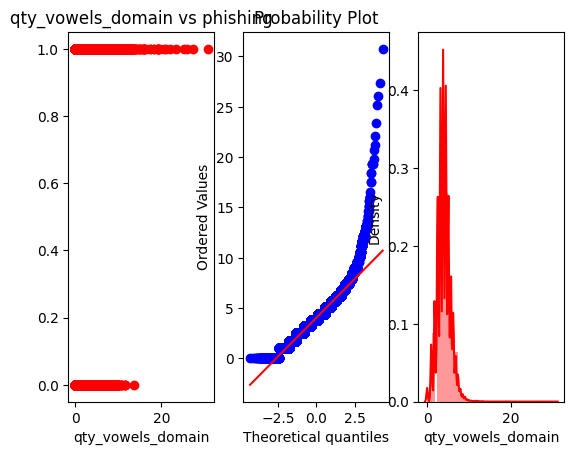

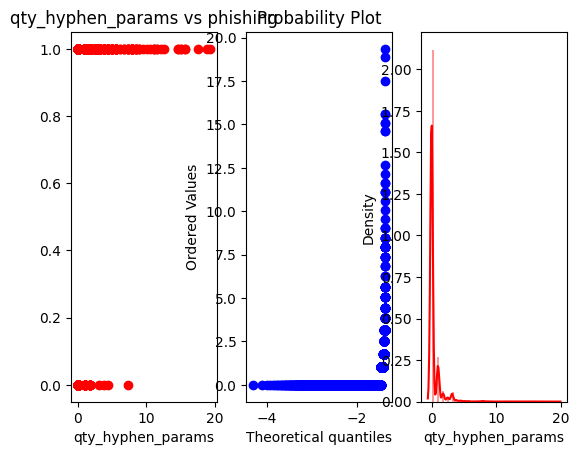

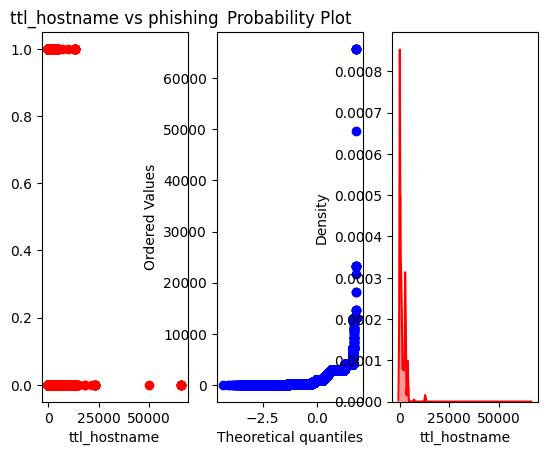

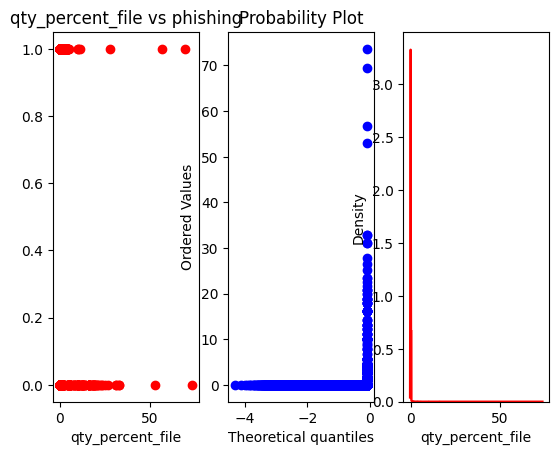

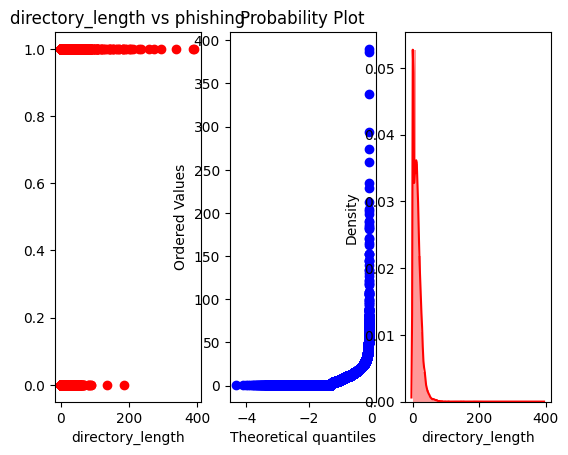

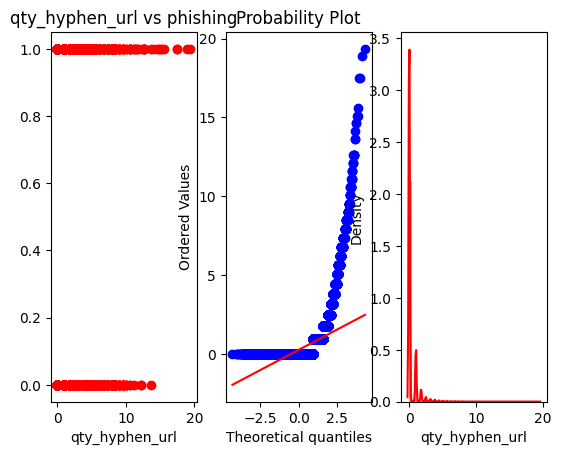

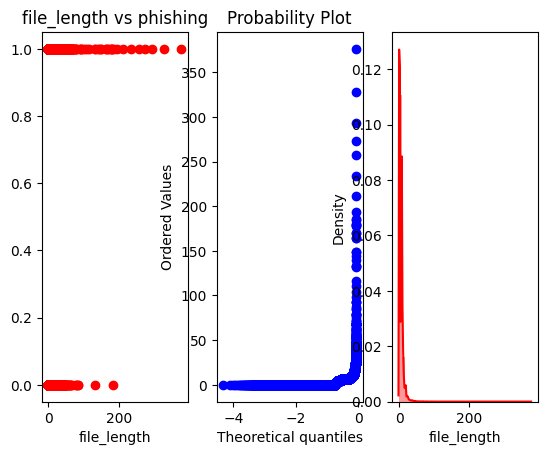

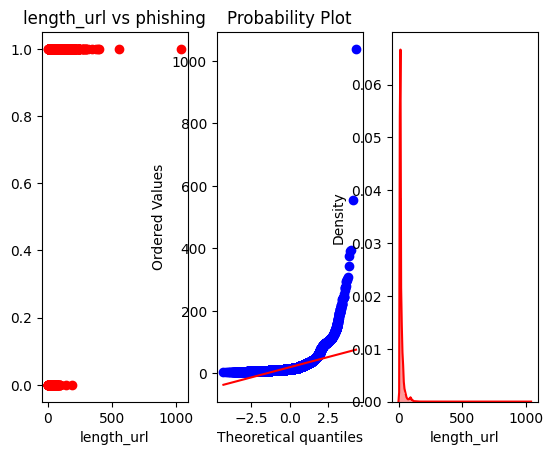

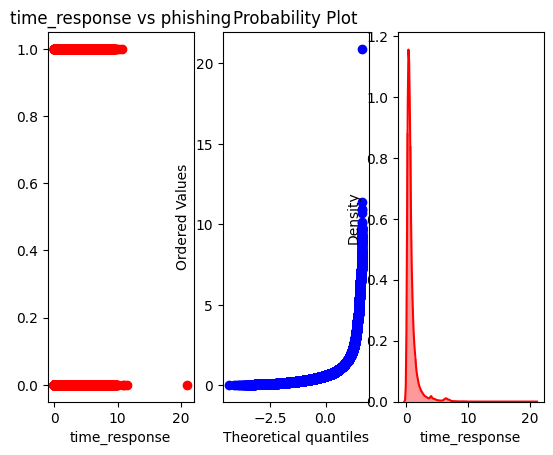

In [152]:
data = df.copy()

# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
n=len(colors)

for feature in continuous_features:

    data[feature] = df[feature]**(1/1.2)
    plt.subplot(1,3,1)
    plt.scatter(data[feature],data['phishing'],color=colors[i%len(colors)])
    plt.xlabel(feature)

    plt.title(f"{feature} vs phishing")
    plt.subplot(1,3,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

    plt.subplot(1,3,3)
    sns.distplot(data[feature],color=colors[i%len(colors)])

    plt.show()

# BoxCOx Transformation
- y_transformed = (y^λ - 1) / λ if λ != 0
- log(y) if λ = 0

- Normalizing the data:
- Homogenizing variance
- Parameter estimation

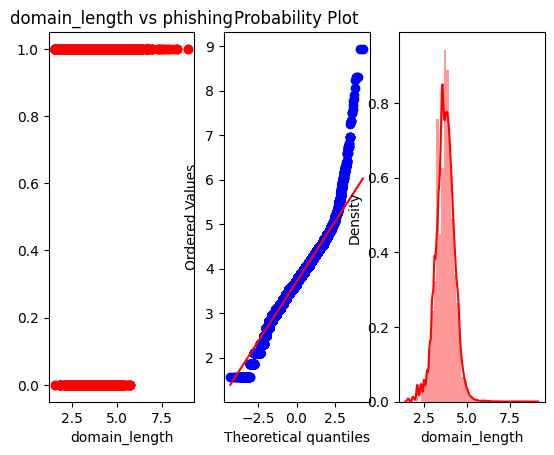

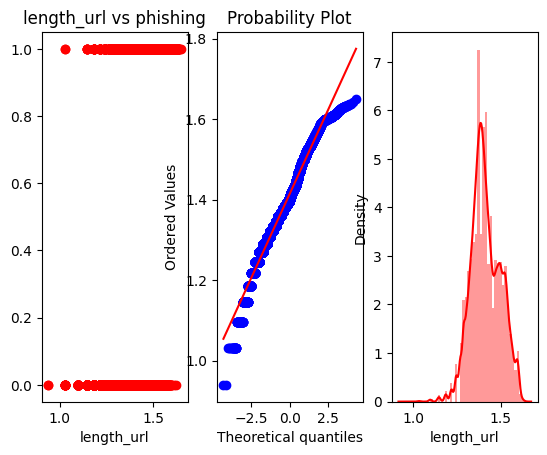

In [153]:
data = df.copy()

# Define a list of colors
colors = ['red', 'green', 'blue', 'orange', 'purple']
i=0
n=len(colors)

for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        try:
            data[feature], parameters =  stat.boxcox(df[feature])
        except:
            continue
        plt.subplot(1,3,1)
        plt.scatter(data[feature],data['phishing'],color=colors[i%len(colors)])
        plt.xlabel(feature)

        plt.title(f"{feature} vs phishing")
        plt.subplot(1,3,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)

        plt.subplot(1,3,3)
        sns.distplot(data[feature],color=colors[i%len(colors)])

        plt.show()

#### Observation: Clearly box cox transformation seems to be working and making the distributions normal

# Categorical Features

No categorical features present

# Outliers

In [154]:
# Define a function to remove outliers based on Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    return df[(z_scores < threshold).all(axis=1)]

# Specify the columns to check for outliers
columns_to_check = list(df.columns)

# Remove outliers from the dataframe
df_no_outliers = remove_outliers_zscore(df, columns_to_check)

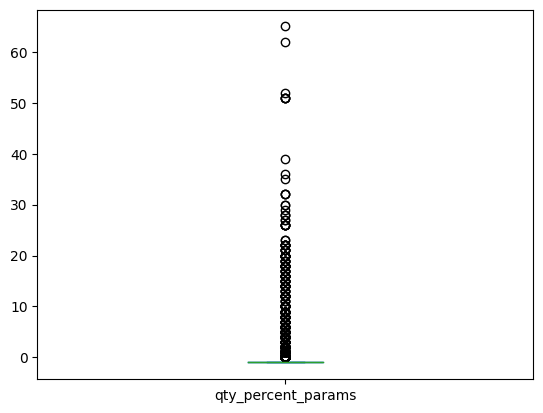

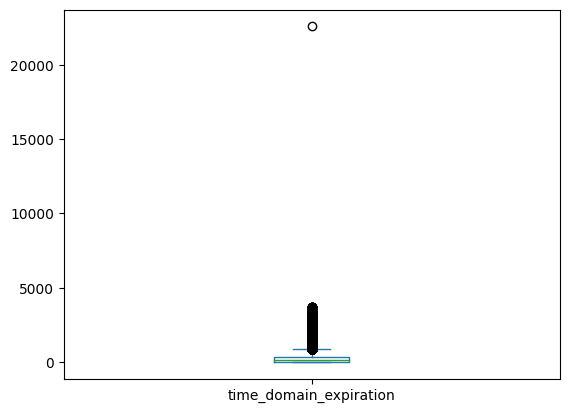

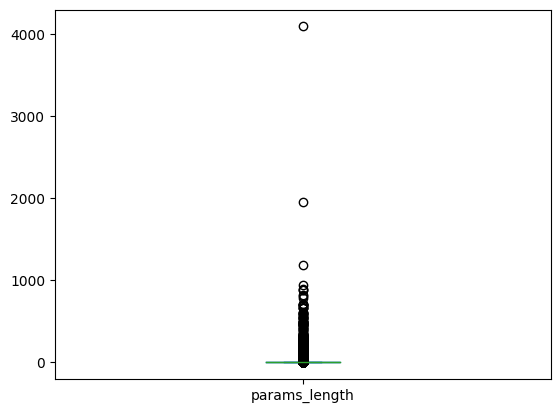

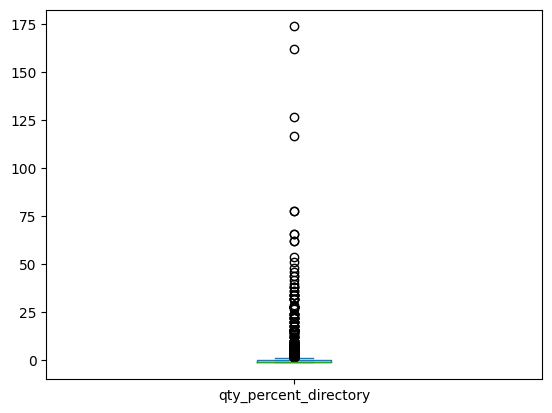

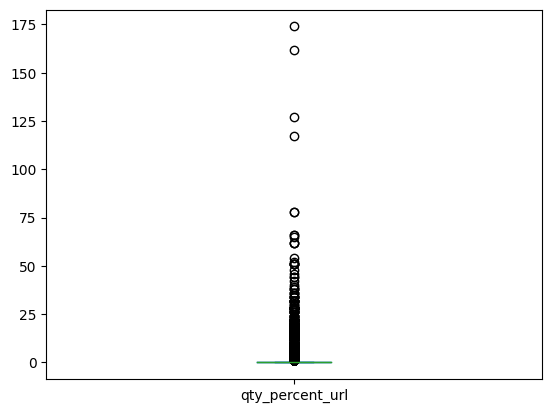

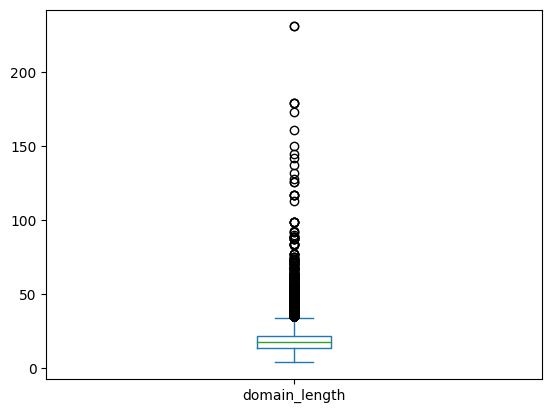

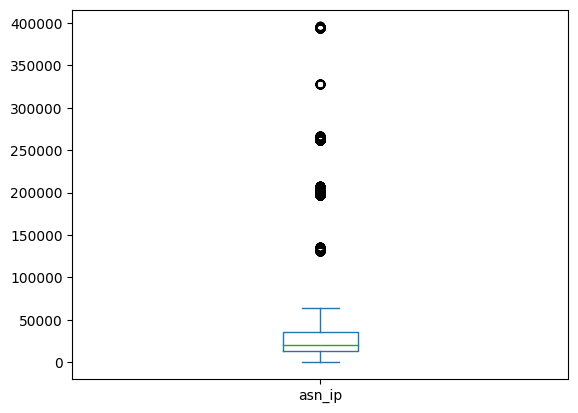

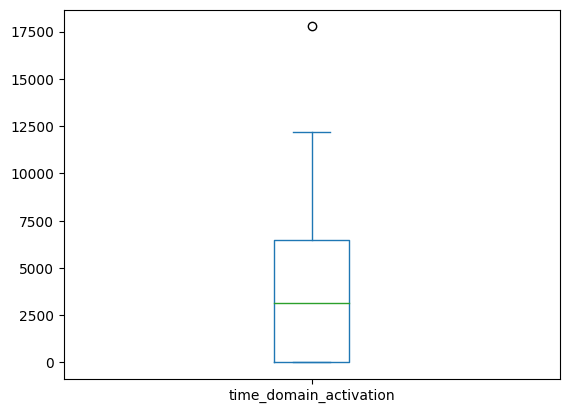

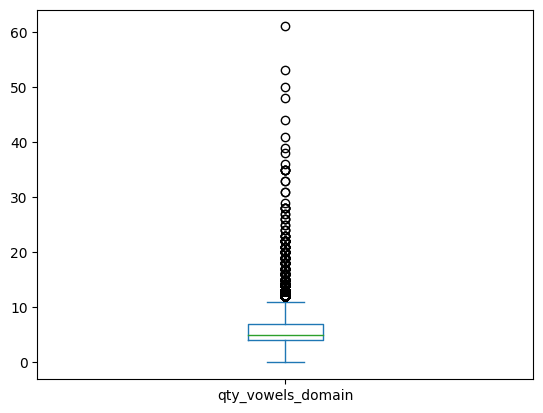

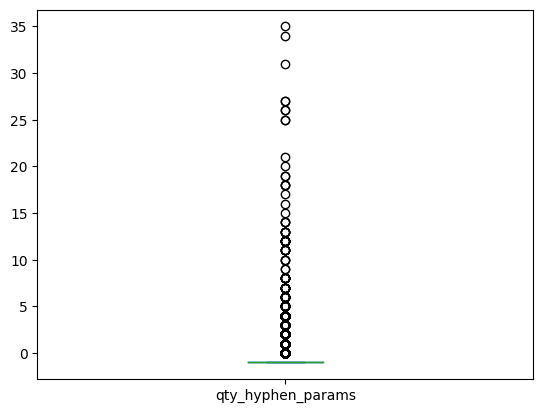

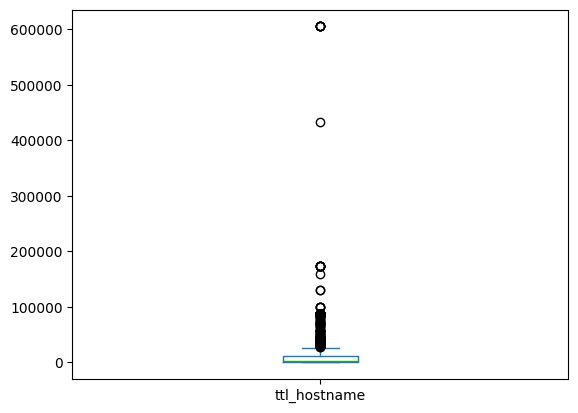

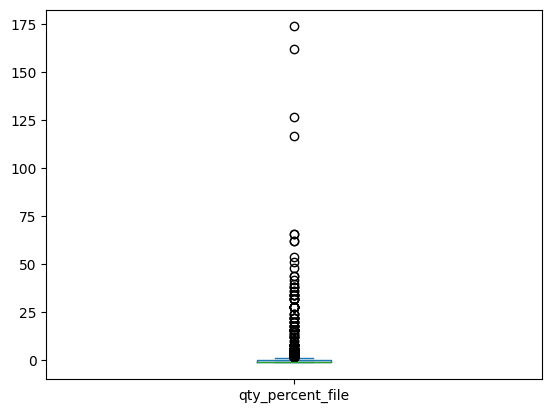

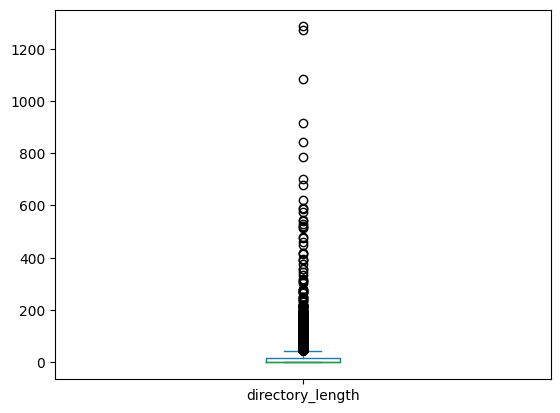

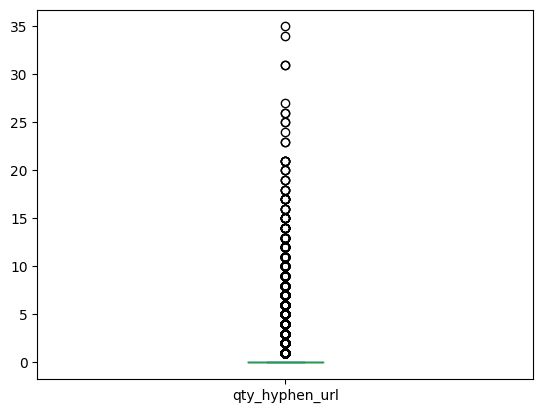

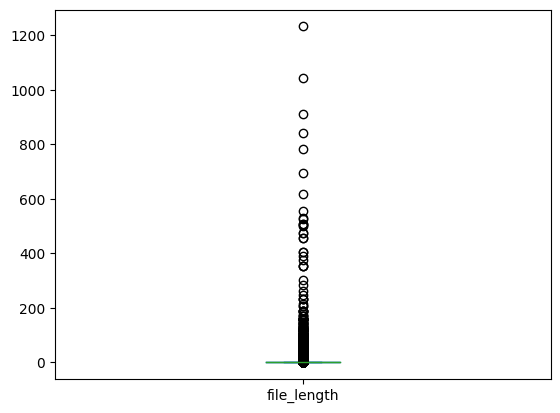

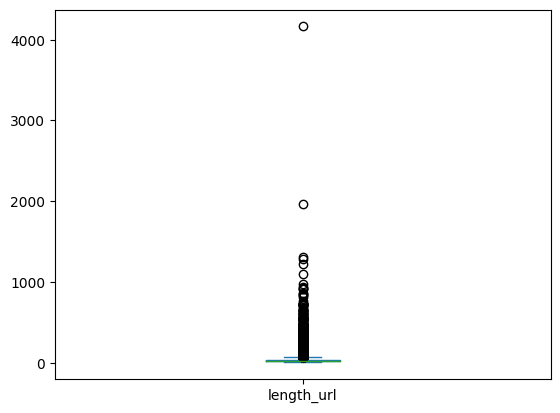

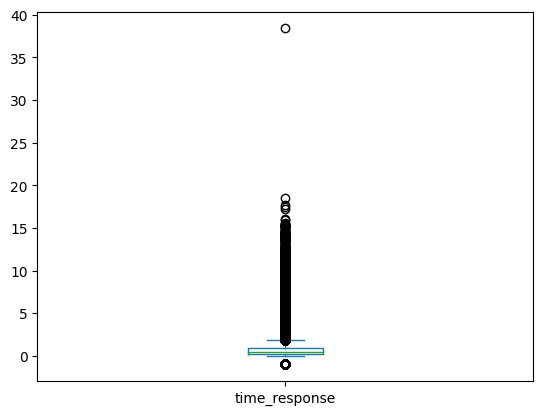

In [155]:
data = df.copy()
for feature in continuous_features:
    data[feature].plot.box()
    plt.show()

### Observation: Many features have outliers

# Corelations

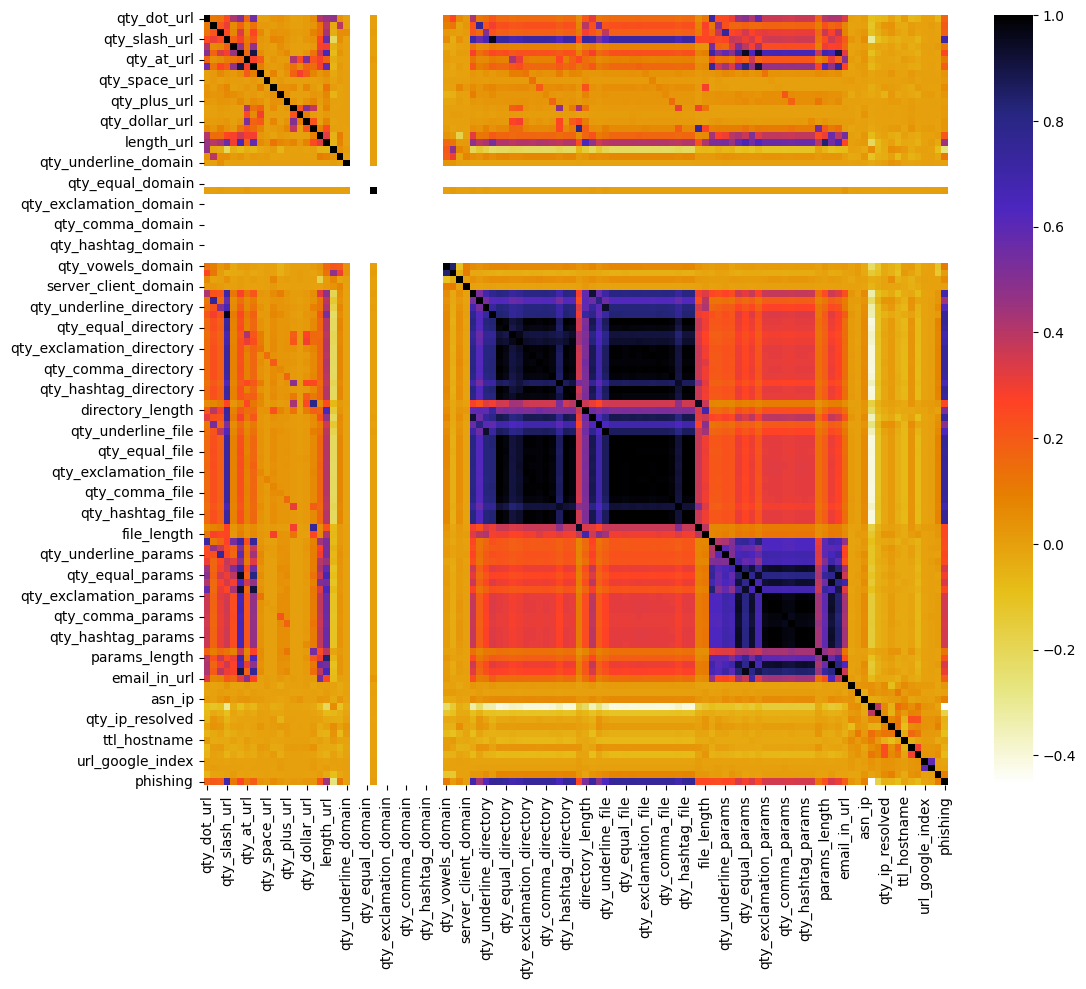

In [156]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, cmap=plt.cm.CMRmap_r)
plt.show()

### Observation: Clearly, there are many features among which corelation is too high

In [157]:
np.corrcoef(df['phishing'],df['time_domain_activation'])

array([[ 1.        , -0.45657164],
       [-0.45657164,  1.        ]])

In [158]:
np.corrcoef(df['phishing'],np.sqrt(df['time_domain_activation']))

array([[ 1., nan],
       [nan, nan]])

In [159]:
continuous_features

['qty_percent_params',
 'time_domain_expiration',
 'params_length',
 'qty_percent_directory',
 'qty_percent_url',
 'domain_length',
 'asn_ip',
 'time_domain_activation',
 'qty_vowels_domain',
 'qty_hyphen_params',
 'ttl_hostname',
 'qty_percent_file',
 'directory_length',
 'qty_hyphen_url',
 'file_length',
 'length_url',
 'time_response']

In [160]:
df['phishing'].value_counts(normalize=True)

0    0.6503
1    0.3497
Name: phishing, dtype: float64

In [161]:
def get_top_correlated_features(df, dependent_feature, k):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Get the absolute correlation values with the dependent feature
    corr_with_dependent = corr_matrix[dependent_feature].abs()

    # Sort the correlation values in descending order
    sorted_corr = corr_with_dependent.sort_values(ascending=False)

    # Exclude the dependent feature itself
    sorted_corr = sorted_corr.drop(dependent_feature)

    # Get the top k features
    top_k_features = sorted_corr[:k].index.tolist()

    return top_k_features

dependent_feature = 'phishing'  # Replace 'target' with the name of your dependent feature
k = 20  # k number of top correlated features

top_features = get_top_correlated_features(df, dependent_feature, k)
print(top_features)

['qty_slash_directory', 'qty_dollar_file', 'qty_hashtag_file', 'qty_slash_file', 'qty_hashtag_directory', 'qty_questionmark_directory', 'qty_questionmark_file', 'qty_at_file', 'qty_exclamation_file', 'qty_and_file', 'qty_tilde_file', 'qty_equal_file', 'qty_comma_file', 'qty_comma_directory', 'qty_space_file', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_equal_directory', 'qty_plus_file']


In [162]:

# Calculate correlation matrix
corr_matrix = df.corr()

def get_high_correlation_feature(dataset, threshold):
    # Find highly correlated feature pairs
    high_corr_features = set()
    for i in range(len(corr_matrix.columns)-1):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                feature_i = corr_matrix.columns[i]
                feature_j = corr_matrix.columns[j]
                high_corr_features.add(feature_i)
    return high_corr_features

high_corr_features=get_high_correlation_feature(df.iloc[:-1],0.85)

# Remove highly correlated features
for feature in df.columns[:-1]:
  if feature in high_corr_features:
     df.drop(feature, axis=1, inplace=True)

# Print the DataFrame after removing highly correlated features
print(len(high_corr_features))
print(len(df.columns))

42

In [ ]:
# def get_high_correlation_feature(dataset, threshold):
#     col_corr = set() ## set of column names to be dropped
#     corr_matrix = dataset.corr()
    
#     for i in range(len(corr_matrix.columns)-1):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i,j]) > threshold:
#                 colname = corr_matrix.columns[i] ## getting the column name
#                 #print(corr_matrix.columns[i],"-----" ,corr_matrix.columns[j], "====", corr_matrix.iloc[i,j])
#                 col_corr.add(colname)
#     return(col_corr)

In [ ]:
corelated_features = get_high_correlation_feature(df[:-1],0.85)

In [163]:
len(df.columns)

43

# Inferences ▶
#EDA
1. Data Collection
2. Data Cleaning
- mssing vals imputation- mode
- outliers
- duplicates(about 1400 << 80k rows)
3. Data Visualisation
- large number of outliers
- highly left and right skewed
- correlations
4. Data Transformation
- log, exponential, boxcox, square-root, reciprocal
5. Data Analysis
- imputation - mode
- duplicates dropped
- outliers - remove through z_scores
- transformation - BoxCox
- correlation - some features highly correlated : top 20 features extracted
6. Statistical Modelling

In [ ]:
# # **Phishing Website Detection Feature Extraction**

# *Final project of AI & Cybersecurity Course*
# # **1. Objective:**
# A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this notebook is to collect data & extract the selctive features form the URLs.

# *This project is worked on Google Collaboratory.*


# # **2. Collecting the Data:**
# For this project, we need a bunch of urls of type legitimate (0) and phishing (1). 

# The collection of phishing urls is rather easy because of the opensource service called PhishTank. This service provide a set of phishing URLs in multiple formats like csv, json etc. that gets updated hourly. To download the data: https://www.phishtank.com/developer_info.php

# For the legitimate URLs, I found a source that has a collection of benign, spam, phishing, malware & defacement URLs. The source of the dataset is University of New Brunswick, https://www.unb.ca/cic/datasets/url-2016.html. The number of legitimate URLs in this collection are 35,300. The URL collection is downloaded & from that, *'Benign_list_big_final.csv'* is the file of our interest. This file is then uploaded to the Colab for the feature extraction. 

# ## **2.1. Phishing URLs:**

# The phishing URLs are collected from the PhishTank from the link provided. The csv file of phishing URLs is obtained by using wget command. After downlaoding the dataset, it is loaded into a DataFrame.
# #importing required packages for this module
# import pandas as pd
# #Downloading the phishing URLs file
# !wget http://data.phishtank.com/data/online-valid.csv
# The above command downlaods the file of phishing URLs, *online-valid.csv* and stores in the */content/* folder. 
# #loading the phishing URLs data to dataframe
# data0 = pd.read_csv("online-valid.csv")
# data0.head()
# data0.shape
# So, the data has thousands of phishing URLs. But the problem here is, this data gets updated hourly. Without getting into the risk of data imbalance, I am considering a margin value of 10,000 phishing URLs & 5000 legitimate URLs. 

# Thereby, picking up 5000 samples from the above dataframe randomly.
# #Collecting 5,000 Phishing URLs randomly
# phishurl = data0.sample(n = 5000, random_state = 12).copy()
# phishurl = phishurl.reset_index(drop=True)
# phishurl.head()
# phishurl.shape
# As of now we collected 5000 phishing URLs. Now, we need to collect the legitimate URLs.

# ## **2.2. Legitimate URLs:**

# From the uploaded *Benign_list_big_final.csv* file, the URLs are loaded into a dataframe.
# #Loading legitimate files 
# data1 = pd.read_csv("Benign_list_big_final.csv")
# data1.columns = ['URLs']
# data1.head()
# As stated above, 5000 legitimate URLs are randomaly picked from the above dataframe.
# #Collecting 5,000 Legitimate URLs randomly
# legiurl = data1.sample(n = 5000, random_state = 12).copy()
# legiurl = legiurl.reset_index(drop=True)
# legiurl.head()
# legiurl.shape
# # **3. Feature Extraction:**

# In this step, features are extracted from the URLs dataset.

# The extracted features are categorized into


# 1.   Address Bar based Features
# 2.   Domain based Features
# 3.   HTML & Javascript based Features


# ### **3.1. Address Bar Based Features:**

# Many features can be extracted that can be consided as address bar base features. Out of them, below mentioned were considered for this project.


# *   Domain of URL
# *   IP Address in URL
# *   "@" Symbol in URL
# *   Length of URL
# *   Depth of URL
# *   Redirection "//" in URL
# *   "http/https" in Domain name
# *   Using URL Shortening Services “TinyURL”
# *   Prefix or Suffix "-" in Domain

# Each of these features are explained and the coded below:
# # importing required packages for this section
# from urllib.parse import urlparse,urlencode
# import ipaddress
# import re
# #### **3.1.1. Domain of the URL**
# Here, we are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.
# # 1.Domain of the URL (Domain) 
# def getDomain(url):  
#   domain = urlparse(url).netloc
#   if re.match(r"^www.",domain):
# 	       domain = domain.replace("www.","")
#   return domain
# #### **3.1.2. IP Address in the URL**

# Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.

# If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).


# # 2.Checks for IP address in URL (Have_IP)
# def havingIP(url):
#   try:
#     ipaddress.ip_address(url)
#     ip = 1
#   except:
#     ip = 0
#   return ip

# #### **3.1.3. "@" Symbol in URL**

# Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol. 

# If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 3.Checks the presence of @ in URL (Have_At)
# def haveAtSign(url):
#   if "@" in url:
#     at = 1    
#   else:
#     at = 0    
#   return at
# #### **3.1.4. Length of URL**

# Computes the length of the URL. Phishers can use long URL to hide the doubtful part in the address bar. In this project, if the length of the URL is greater than or equal 54 characters then the URL classified as phishing otherwise legitimate.

# If the length of URL >= 54 , the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 4.Finding the length of URL and categorizing (URL_Length)
# def getLength(url):
#   if len(url) < 54:
#     length = 0            
#   else:
#     length = 1            
#   return length
# #### **3.1.5. Depth of URL**

# Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.

# The value of feature is a numerical based on the URL.
# # 5.Gives number of '/' in URL (URL_Depth)
# def getDepth(url):
#   s = urlparse(url).path.split('/')
#   depth = 0
#   for j in range(len(s)):
#     if len(s[j]) != 0:
#       depth = depth+1
#   return depth
# #### **3.1.6. Redirection "//" in URL**

# Checks the presence of "//" in the URL. The existence of “//” within the URL path means that the user will be redirected to another website. The location of the “//” in URL is computed. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.

# If the "//" is anywhere in the URL apart from after the protocal, thee value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 6.Checking for redirection '//' in the url (Redirection)
# def redirection(url):
#   pos = url.rfind('//')
#   if pos > 6:
#     if pos > 7:
#       return 1
#     else:
#       return 0
#   else:
#     return 0
# #### **3.1.7. "http/https" in Domain name**

# Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.

# If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
# def httpDomain(url):
#   domain = urlparse(url).netloc
#   if 'https' in domain:
#     return 1
#   else:
#     return 0
# #### **3.1.8. Using URL Shortening Services “TinyURL”**

# URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL. 

# If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# #listing shortening services
# shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
#                       r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
#                       r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
#                       r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
#                       r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
#                       r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
#                       r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
#                       r"tr\.im|link\.zip\.net"
# # 8. Checking for Shortening Services in URL (Tiny_URL)
# def tinyURL(url):
#     match=re.search(shortening_services,url)
#     if match:
#         return 1
#     else:
#         return 0
# #### **3.1.9. Prefix or Suffix "-" in Domain**

# Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage. 

# If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
# def prefixSuffix(url):
#     if '-' in urlparse(url).netloc:
#         return 1            # phishing
#     else:
#         return 0            # legitimate
# ### **3.2. Domain Based Features:**

# Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

# *   DNS Record
# *   Website Traffic 
# *   Age of Domain
# *   End Period of Domain

# Each of these features are explained and the coded below:
# !pip install python-whois
# # importing required packages for this section
# import re
# from bs4 import BeautifulSoup
# import whois
# import urllib
# import urllib.request
# from datetime import datetime
# #### **3.2.1. DNS Record**

# For phishing websites, either the claimed identity is not recognized by the WHOIS database or no records founded for the hostname. 
# If the DNS record is empty or not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 11.DNS Record availability (DNS_Record)
# # obtained in the featureExtraction function itself
# #### **3.2.2. Web Traffic**

# This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”.

# If the rank of the domain < 100000, the vlaue of this feature is 1 (phishing) else 0 (legitimate).
# # 12.Web traffic (Web_Traffic)
# def web_traffic(url):
#   try:
#     #Filling the whitespaces in the URL if any
#     url = urllib.parse.quote(url)
#     rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
#         "REACH")['RANK']
#     rank = int(rank)
#   except TypeError:
#         return 1
#   if rank <100000:
#     return 1
#   else:
#     return 0
# #### **3.2.3. Age of Domain**

# This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. The minimum age of the legitimate domain is considered to be 12 months for this project. Age here is nothing but different between creation and expiration time.

# If age of domain > 12 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).
# # 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
# def domainAge(domain_name):
#   creation_date = domain_name.creation_date
#   expiration_date = domain_name.expiration_date
#   if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
#     try:
#       creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
#       expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
#     except:
#       return 1
#   if ((expiration_date is None) or (creation_date is None)):
#       return 1
#   elif ((type(expiration_date) is list) or (type(creation_date) is list)):
#       return 1
#   else:
#     ageofdomain = abs((expiration_date - creation_date).days)
#     if ((ageofdomain/30) < 6):
#       age = 1
#     else:
#       age = 0
#   return age
# #### **3.2.4. End Period of Domain**

# This feature can be extracted from WHOIS database. For this feature, the remaining domain time is calculated by finding the different between expiration time & current time. The end period considered for the legitimate domain is 6 months or less  for this project. 

# If end period of domain > 6 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).
# # 14.End time of domain: The difference between termination time and current time (Domain_End) 
# def domainEnd(domain_name):
#   expiration_date = domain_name.expiration_date
#   if isinstance(expiration_date,str):
#     try:
#       expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
#     except:
#       return 1
#   if (expiration_date is None):
#       return 1
#   elif (type(expiration_date) is list):
#       return 1
#   else:
#     today = datetime.now()
#     end = abs((expiration_date - today).days)
#     if ((end/30) < 6):
#       end = 0
#     else:
#       end = 1
#   return end
# ## **3.3. HTML and JavaScript based Features**

# Many features can be extracted that come under this category. Out of them, below mentioned were considered for this project.

# *   IFrame Redirection
# *   Status Bar Customization
# *   Disabling Right Click
# *   Website Forwarding

# Each of these features are explained and the coded below:
# # importing required packages for this section
# import requests
# ### **3.3.1. IFrame Redirection**

# IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation. 

# If the iframe is empty or repsonse is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 15. IFrame Redirection (iFrame)
# def iframe(response):
#   if response == "":
#       return 1
#   else:
#       if re.findall(r"[<iframe>|<frameBorder>]", response.text):
#           return 0
#       else:
#           return 1
# ### **3.3.2. Status Bar Customization**

# Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar

# If the response is empty or onmouseover is found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).
# # 16.Checks the effect of mouse over on status bar (Mouse_Over)
# def mouseOver(response): 
#   if response == "" :
#     return 1
#   else:
#     if re.findall("<script>.+onmouseover.+</script>", response.text):
#       return 1
#     else:
#       return 0
# ### **3.3.3. Disabling Right Click**

# Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled.

# If the response is empty or onmouseover is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).



# # 17.Checks the status of the right click attribute (Right_Click)
# def rightClick(response):
#   if response == "":
#     return 1
#   else:
#     if re.findall(r"event.button ?== ?2", response.text):
#       return 0
#     else:
#       return 1
# ### **3.3.4. Website Forwarding**
# The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times. 



# # 18.Checks the number of forwardings (Web_Forwards)    
# def forwarding(response):
#   if response == "":
#     return 1
#   else:
#     if len(response.history) <= 2:
#       return 0
#     else:
#       return 1
# ## **4. Computing URL Features**

# Create a list and a function that calls the other functions and stores all the features of the URL in the list. We will extract the features of each URL and append to this list.
# #Function to extract features
# def featureExtraction(url,label):

#   features = []
#   #Address bar based features (10)
#   features.append(getDomain(url))
#   features.append(havingIP(url))
#   features.append(haveAtSign(url))
#   features.append(getLength(url))
#   features.append(getDepth(url))
#   features.append(redirection(url))
#   features.append(httpDomain(url))
#   features.append(tinyURL(url))
#   features.append(prefixSuffix(url))
  
#   #Domain based features (4)
#   dns = 0
#   try:
#     domain_name = whois.whois(urlparse(url).netloc)
#   except:
#     dns = 1

#   features.append(dns)
#   features.append(web_traffic(url))
#   features.append(1 if dns == 1 else domainAge(domain_name))
#   features.append(1 if dns == 1 else domainEnd(domain_name))
  
#   # HTML & Javascript based features (4)
#   try:
#     response = requests.get(url)
#   except:
#     response = ""
#   features.append(iframe(response))
#   features.append(mouseOver(response))
#   features.append(rightClick(response))
#   features.append(forwarding(response))
#   features.append(label)
  
#   return features
# ### **4.1. Legitimate URLs:**

# Now, feature extraction is done on legitimate URLs.
# legiurl.shape
# #Extracting the feautres & storing them in a list
# legi_features = []
# label = 0

# for i in range(0, 5000):
#   url = legiurl['URLs'][i]
#   legi_features.append(featureExtraction(url,label))
# #converting the list to dataframe
# feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
#                       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
#                       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

# legitimate = pd.DataFrame(legi_features, columns= feature_names)
# legitimate.head()
# # Storing the extracted legitimate URLs fatures to csv file
# legitimate.to_csv('legitimate.csv', index= False)
# ### **4.2. Phishing URLs:**

# Now, feature extraction is performed on phishing URLs.
# phishurl.shape
# #Extracting the feautres & storing them in a list
# phish_features = []
# label = 1
# for i in range(0, 5000):
#   url = phishurl['url'][i]
#   phish_features.append(featureExtraction(url,label))
# #converting the list to dataframe
# feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
#                       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
#                       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

# phishing = pd.DataFrame(phish_features, columns= feature_names)
# phishing.head()
# # Storing the extracted legitimate URLs fatures to csv file
# phishing.to_csv('phishing.csv', index= False)
# ## **5. Final Dataset**

# In the above section we formed two dataframes of legitimate & phishing URL features. Now, we will combine them to a single dataframe and export the data to csv file for the Machine Learning training done in other notebook. 
# #Concatenating the dataframes into one 
# urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
# urldata.head()
# urldata.tail()
# urldata.shape
# # Storing the data in CSV file
# urldata.to_csv('urldata.csv', index=False)
# ## **6. Conclusion**

# With this the objective of this notebook is achieved. We finally extracted 18 features for 10,000 URL which has 5000 phishing & 5000 legitimate URLs.
# ## **7. References**

# * https://archive.ics.uci.edu/ml/datasets/Phishing+Websites 